# Problem Statement:

Insurance Claim Prediction

An insurance policy is an agreement between a company and a customer by which a company undertakes to provide a guarantee of compensation for specified loss, damage or illness in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you pay a premium of Rs. 3000/- each year for car insurance with a coverage of Rs. 100,000/-. Unfortunately, in case of an accident, the car is severely damaged. In that case, the insurance provider company will bear the cost of damage etc. for up to Rs. 100,000. 

Now if you are wondering how can a company bear such a high cost when it charges a premium of only Rs. 3000/- per year only i.e. where the concept of probability comes into the picture. For example, there might be thousands of customers who would be paying a premium of Rs. 3000 every year just like you, but only a few of them (say 2-3) would have had an accident that year and not everyone. This way everyone shares the risk of everyone else.

Our client is an Insurance company that provides insurance for cars to its customers. In this hackathon, you will be closely working with the insurer in understanding the behaviour of the policyholders.


* Problem Statement



CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the highest claim settlement ratio. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.


As it's a fast growing startup, the company would like to optimize the cost of the insurance by identifying the policyholders who are more likely to claim in the next 6 months. 

Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months. The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.





Train and Test Set



The train and test set contains information about different insurance policy holders. The train set includes the target variable is_claim whereas in the test set, you need to predict the target variable is_claim.



Variable

Description

policy_id

Unique identifier of the policyholder

policy_tenure

Time period of the policy

age_of_car

Normalized age of the car in years

age_of_policyholder

Normalized age of policyholder in years

area_cluster

Area cluster of the policyholder

population density

Population density of the city (Policyholder City)

make

Encoded Manufacturer/company of the car

segment

Segment of the car (A/ B1/ B2/ C1/ C2)

model

Encoded name of the car

fuel_type

Type of fuel used by the car

max_torque

Maximum Torque generated by the car (Nm@rpm)

max_power

Maximum Power generated by the car (bhp@rpm)

engine_type

Type of engine used in the car

airbags

Number of airbags installed in the car

is_esc

Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not.

is_adjustable_steering

Boolean flag indicating whether the steering wheel of the car is adjustable or not.

is_tpms

Boolean flag indicating whether Tyre Pressure Monitoring System (TPMS) is present in the car or not.

is_parking_sensors

Boolean flag indicating whether parking sensors are present in the car or not.

is_parking_camera

Boolean flag indicating whether the parking camera is present in the car or not.

rear_brakes_type

Type of brakes used in the rear of the car

displacement

Engine displacement of the car (cc)

cylinder

Number of cylinders present in the engine of the car

transmission_type

Transmission type of the car

gear_box

Number of gears in the car

steering_type

Type of the power steering present in the car

turning_radius

The space a vehicle needs to make a certain turn (Meters)

length

Length of the car (Millimetre)

width

Width of the car (Millimetre)

height

Height of the car (Millimetre)

gross_weight

The maximum allowable weight of the fully-loaded car, including passengers, cargo and equipment (Kg)

is_front_fog_lights

Boolean flag indicating whether front fog lights are available in the car or not.

is_rear_window_wiper

Boolean flag indicating whether the rear window wiper is available in the car or not.

is_rear_window_washer

Boolean flag indicating whether the rear window washer is available in the car or not.

is_rear_window_defogger

Boolean flag indicating whether rear window defogger is available in the car or not.

is_brake_assist

Boolean flag indicating whether the brake assistance feature is available in the car or not.

is_power_door_lock

Boolean flag indicating whether a power door lock is available in the car or not.

is_central_locking

Boolean flag indicating whether the central locking feature is available in the car or not.

is_power_steering

Boolean flag indicating whether power steering is available in the car or not.

is_driver_seat_height_adjustable

Boolean flag indicating whether the height of the driver seat is adjustable or not.

is_day_night_rear_view_mirror

Boolean flag indicating whether day & night rearview mirror is present in the car or not.

is_ecw

Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not.

is_speed_alert

Boolean flag indicating whether the speed alert system is available in the car or not.

ncap_rating

Safety rating given by NCAP (out of 5)

is_claim

Outcome: Boolean flag indicating whether the policyholder file a claim in the next 6 months or not.




Submission File Format



The solution file should follow a format similar to that of the sample submission file. sample_submission.csv contains 2 variables - policy_id and is_claim.


Variable

Description

policy_id

Unique identifier of the policyholder

is_claim

Outcome: Boolean flag indicating whether the policyholder file a claim in the next 6 months or not



In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"]=[20,10]
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
train=pd.read_csv("train_qWM28Yl.csv")
test=pd.read_csv("test_zo1G9sv.csv")

train.shape,test.shape

((58592, 44), (39063, 43))

In [4]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [5]:
test.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


In [41]:
# combing the data
com=pd.concat([train,test],ignore_index=True)
com.shape

(97655, 44)

In [9]:
com.tail(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
97653,ID97654,1.172391,0.08,0.644231,C5,34738,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,NaN
97654,ID97655,0.094030,0.12,0.307692,C8,8794,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.2,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,NaN


In [11]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         97655 non-null  object 
 1   policy_tenure                     97655 non-null  float64
 2   age_of_car                        97655 non-null  float64
 3   age_of_policyholder               97655 non-null  float64
 4   area_cluster                      97655 non-null  object 
 5   population_density                97655 non-null  int64  
 6   make                              97655 non-null  int64  
 7   segment                           97655 non-null  object 
 8   model                             97655 non-null  object 
 9   fuel_type                         97655 non-null  object 
 10  max_torque                        97655 non-null  object 
 11  max_power                         97655 non-null  object 
 12  engi

In [12]:
# cat variable

com.select_dtypes(include="object").columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [17]:
cat_col=[ 'area_cluster', 'segment', 'model', 'fuel_type',
       'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert',"is_claim"]
len(cat_col)

26

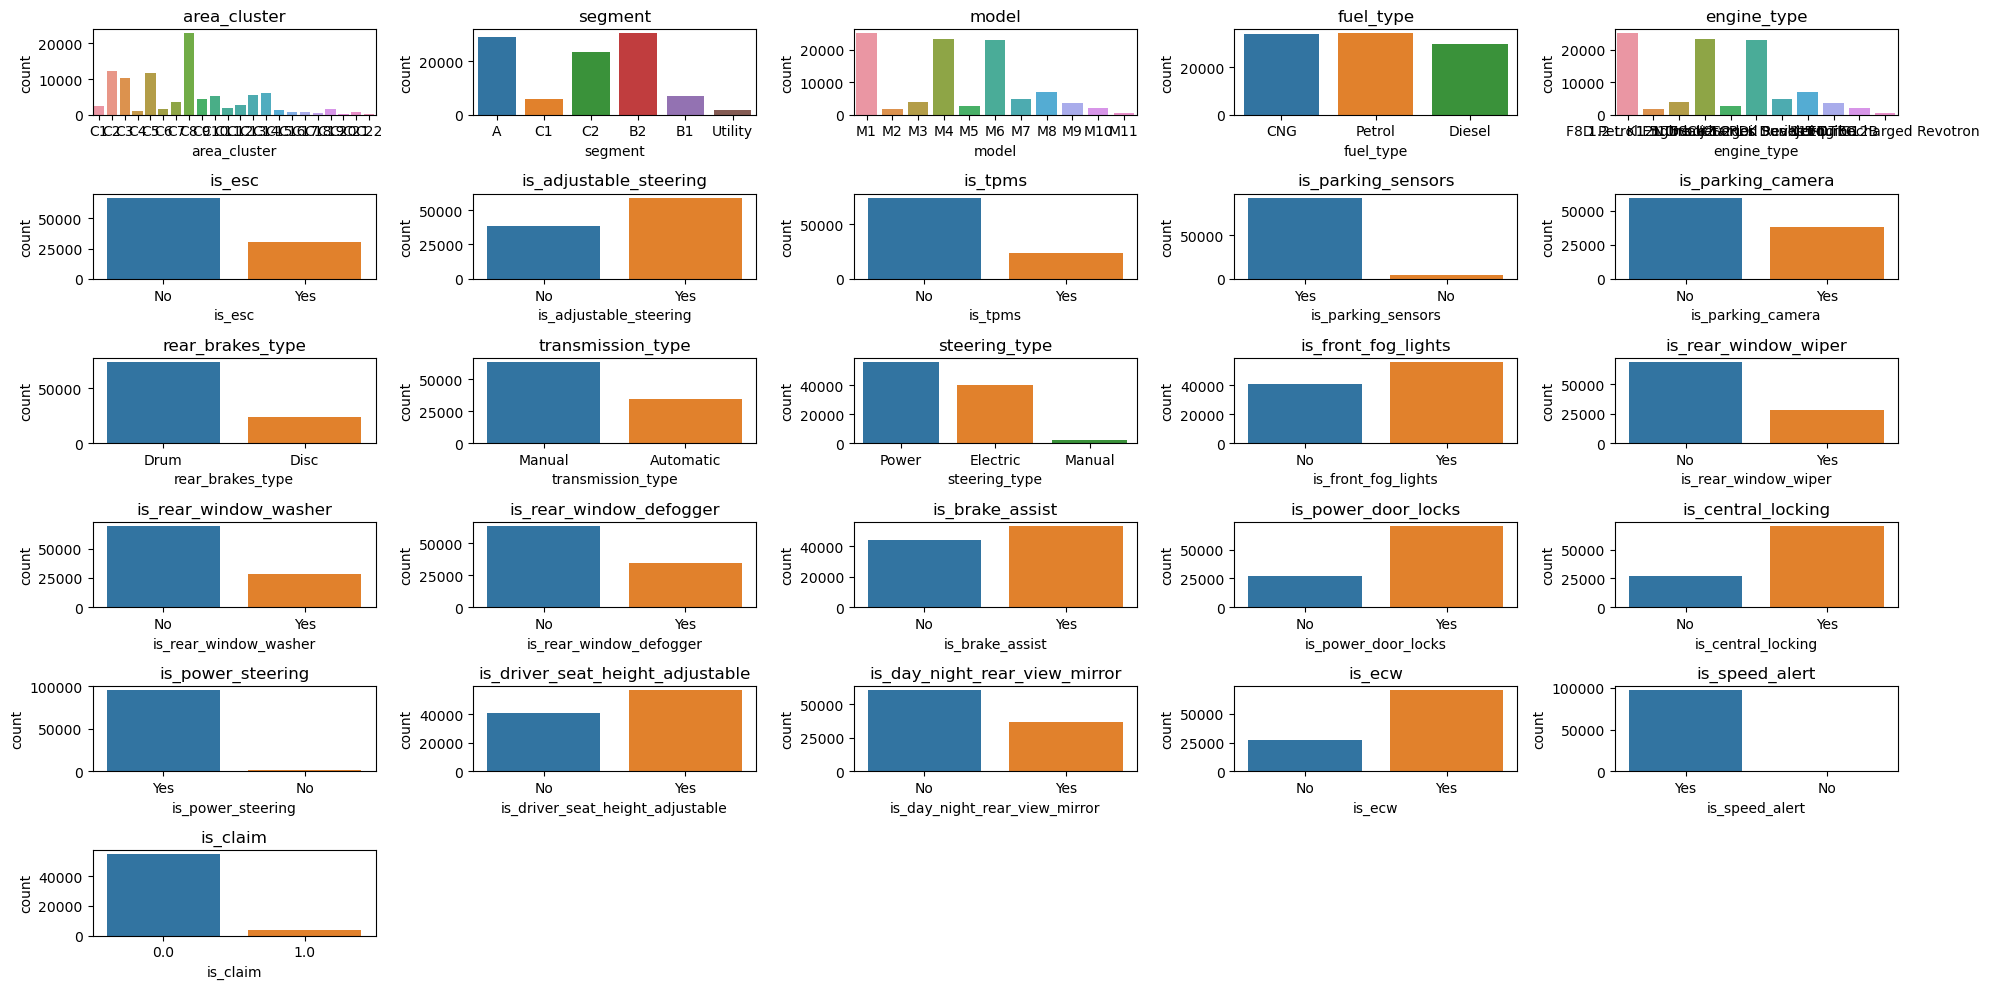

In [20]:
it=1
for i in cat_col:
    plt.subplot(6,5,it)
    sns.countplot(com[i])
    plt.title(i)
    it+=1
    
plt.tight_layout()
plt.show()

#steering type is yes, brake assit is given,
#central locking is available and driver seat height adjustable, having power doors
#ecw is there 
#target variable is highly imbalanced

<AxesSubplot:>

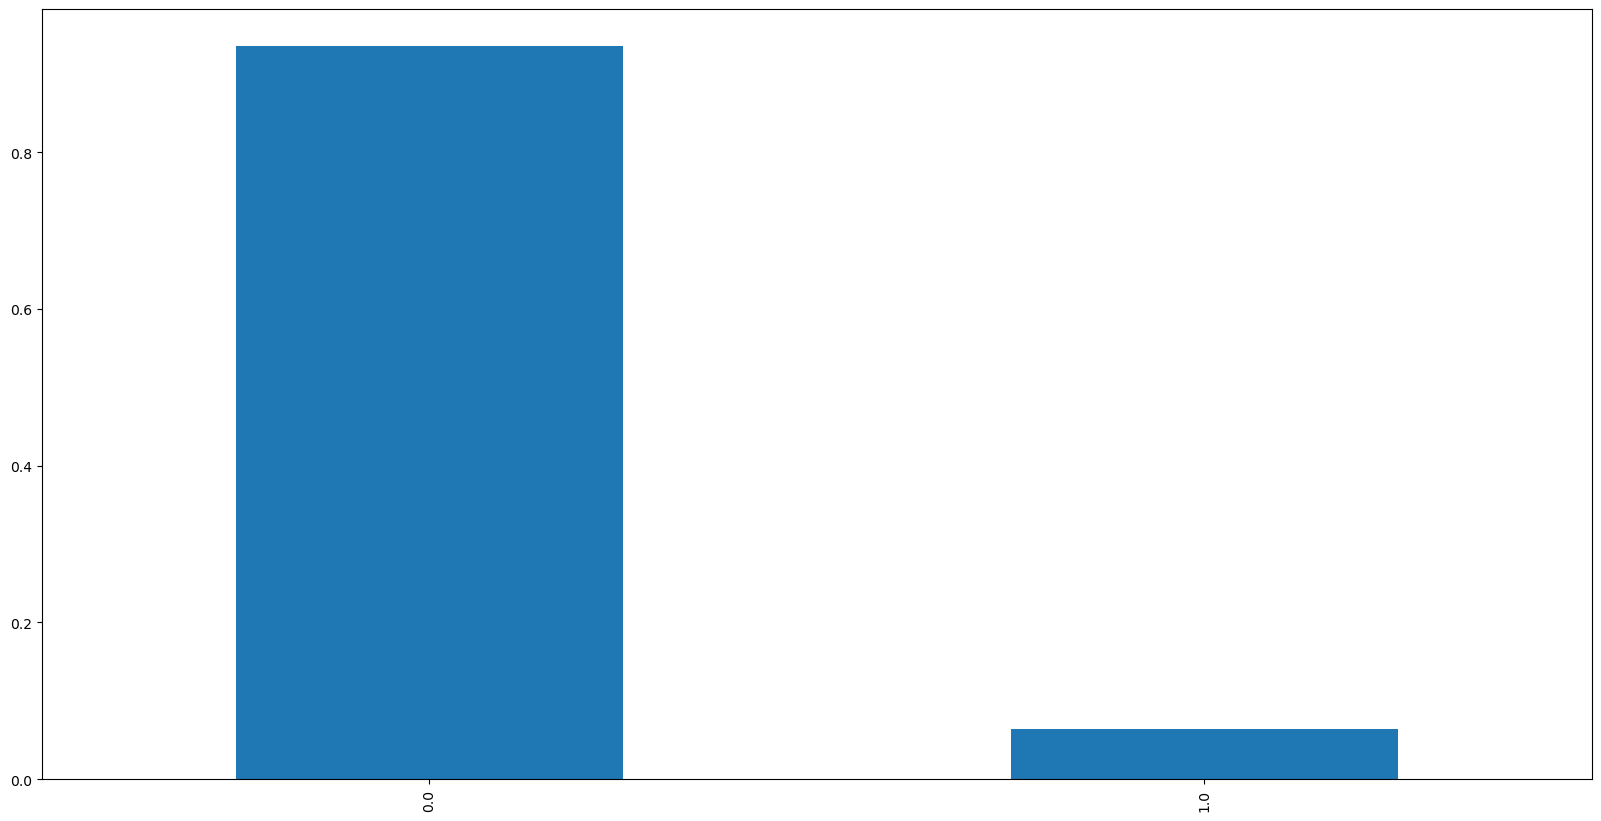

In [21]:
# plotting the target variable 
com.is_claim.value_counts(normalize=True).plot(kind="bar")

In [23]:
#finding the pattern in the data 

train.loc[train.is_claim==1].describe(include="object").T

,count,unique,top,freq
policy_id,3748,3748,ID00013,1
area_cluster,3748,22,C8,954
segment,3748,6,B2,1256
model,3748,11,M6,939
fuel_type,3748,3,Petrol,1363
max_torque,3748,9,113Nm@4400rpm,1220
max_power,3748,9,88.50bhp@6000rpm,1220
engine_type,3748,11,K Series Dual jet,939
is_esc,3748,2,No,2551
is_adjustable_steering,3748,2,Yes,2370


In [25]:
com.select_dtypes(include=np.number).columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [29]:
num_cols=['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density','displacement', 
        'turning_radius', 'length', 'width', 'height',
       'gross_weight']
len(num_cols)

10

In [45]:
# convert ncap rating it category
com["ncap_rating"]=com["ncap_rating"].astype("object")

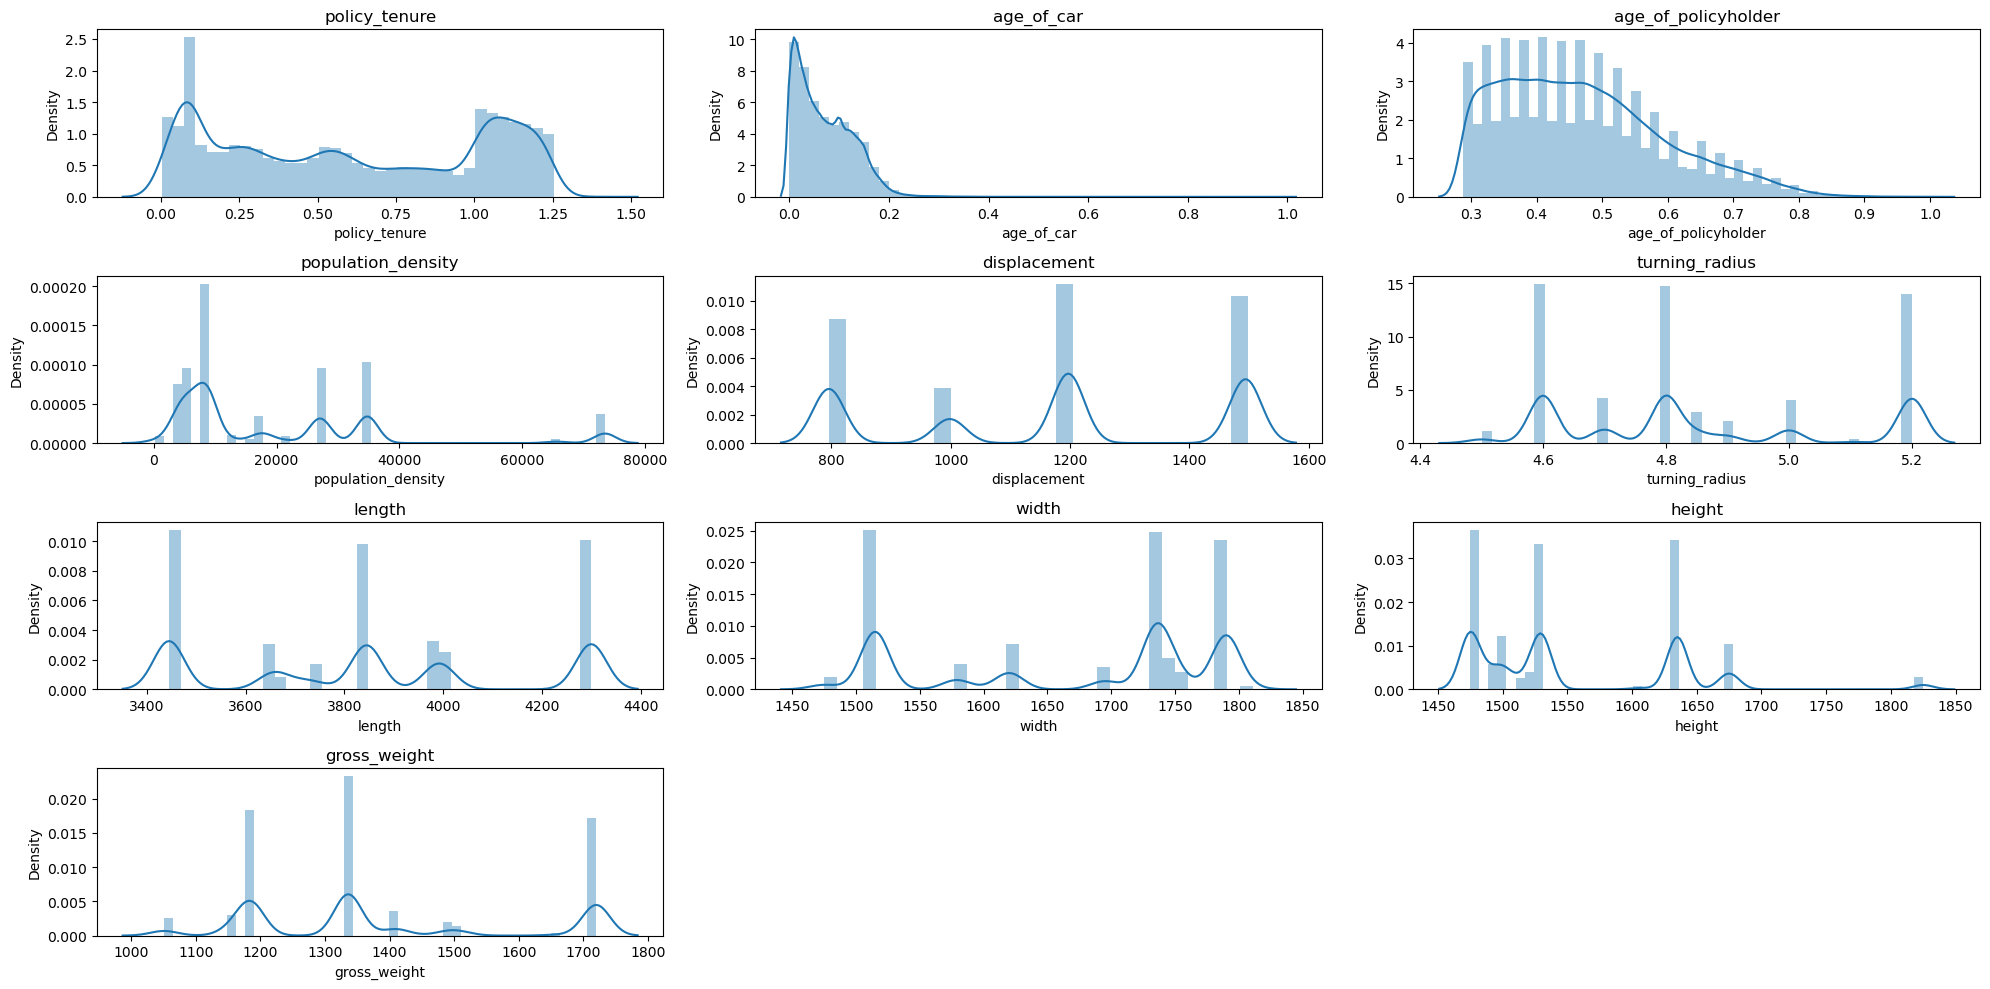

In [30]:
it=1
for i in num_cols:
    plt.subplot(4,3,it)
    sns.distplot(com[i])
    plt.title(i)
    it+=1
    
plt.tight_layout()
plt.show()


In [31]:
com.loc[:,num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,97655.0,0.611269,0.414494,0.002735,0.209729,0.573891,1.039740,1.396641
age_of_car,97655.0,0.069508,0.056774,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,97655.0,0.469287,0.122560,0.288462,0.375000,0.451923,0.548077,1.000000
population_density,97655.0,18822.608090,17656.792570,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
displacement,97655.0,1161.655829,266.560176,796.000000,796.000000,1197.000000,1493.000000,1498.000000
turning_radius,97655.0,4.853024,0.228059,4.500000,4.600000,4.800000,5.000000,5.200000
length,97655.0,3850.017715,311.745860,3445.000000,3445.000000,3845.000000,3995.000000,4300.000000
width,97655.0,1672.050187,112.042508,1475.000000,1515.000000,1735.000000,1755.000000,1811.000000
height,97655.0,1553.214500,79.385788,1475.000000,1475.000000,1530.000000,1635.000000,1825.000000
gross_weight,97655.0,1384.966750,212.543007,1051.000000,1185.000000,1335.000000,1510.000000,1720.000000


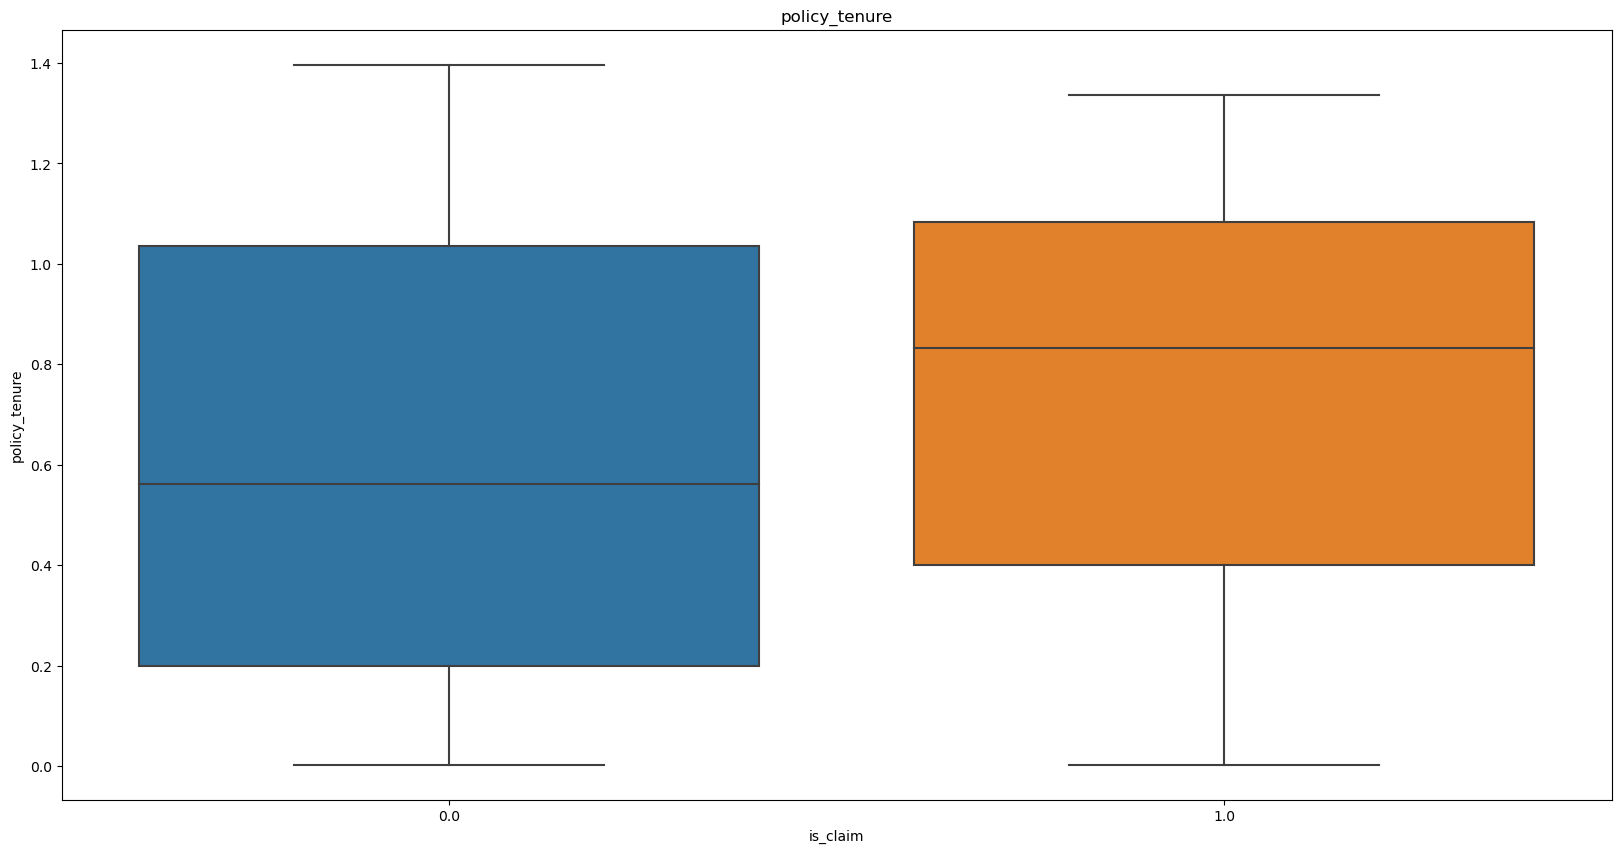

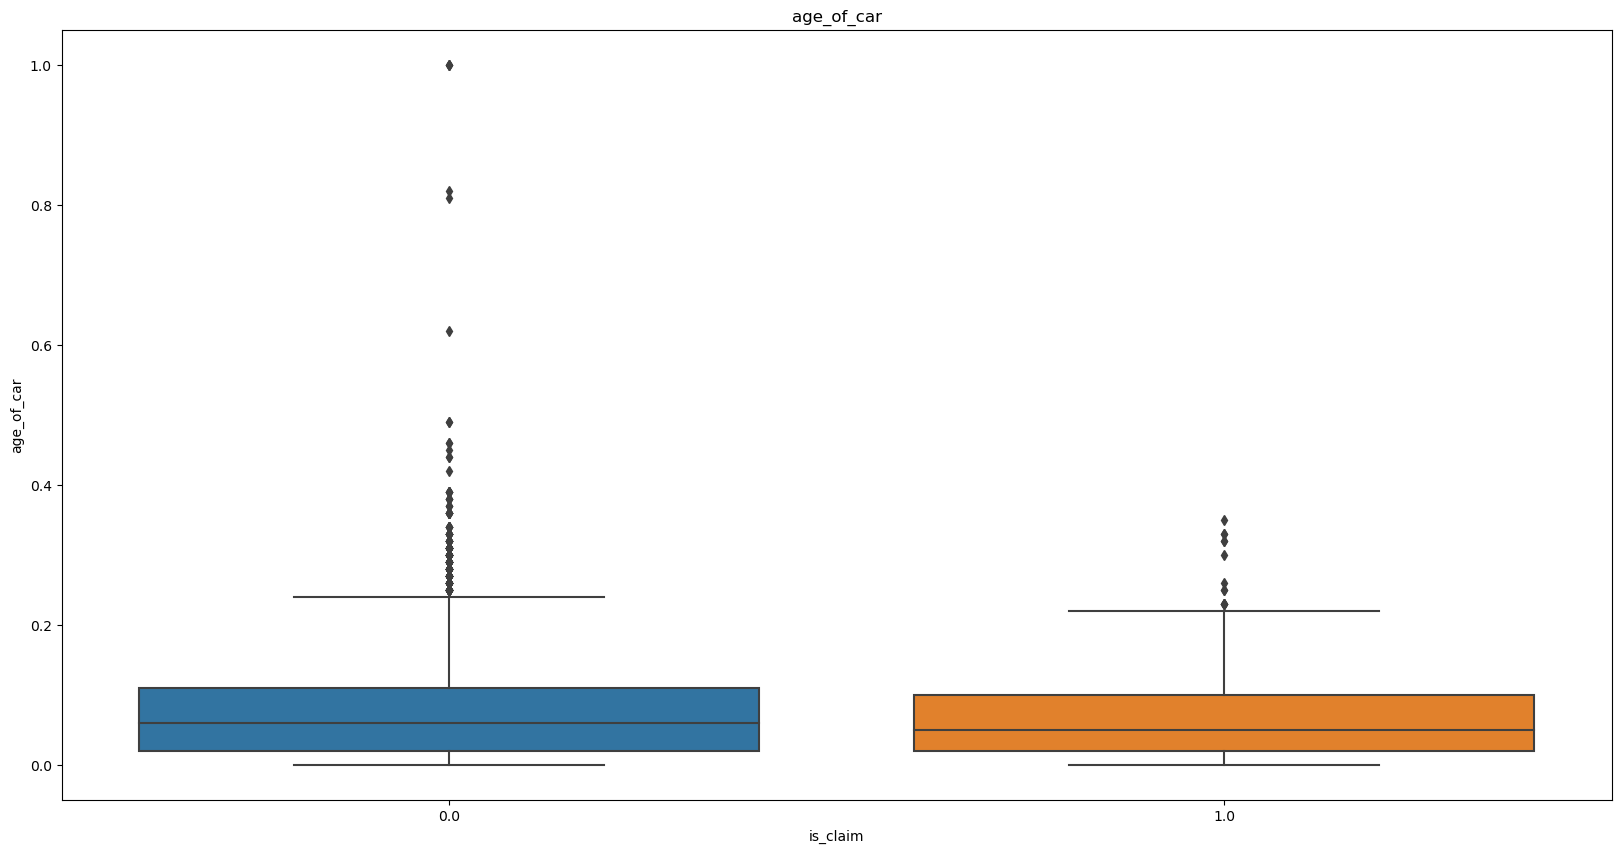

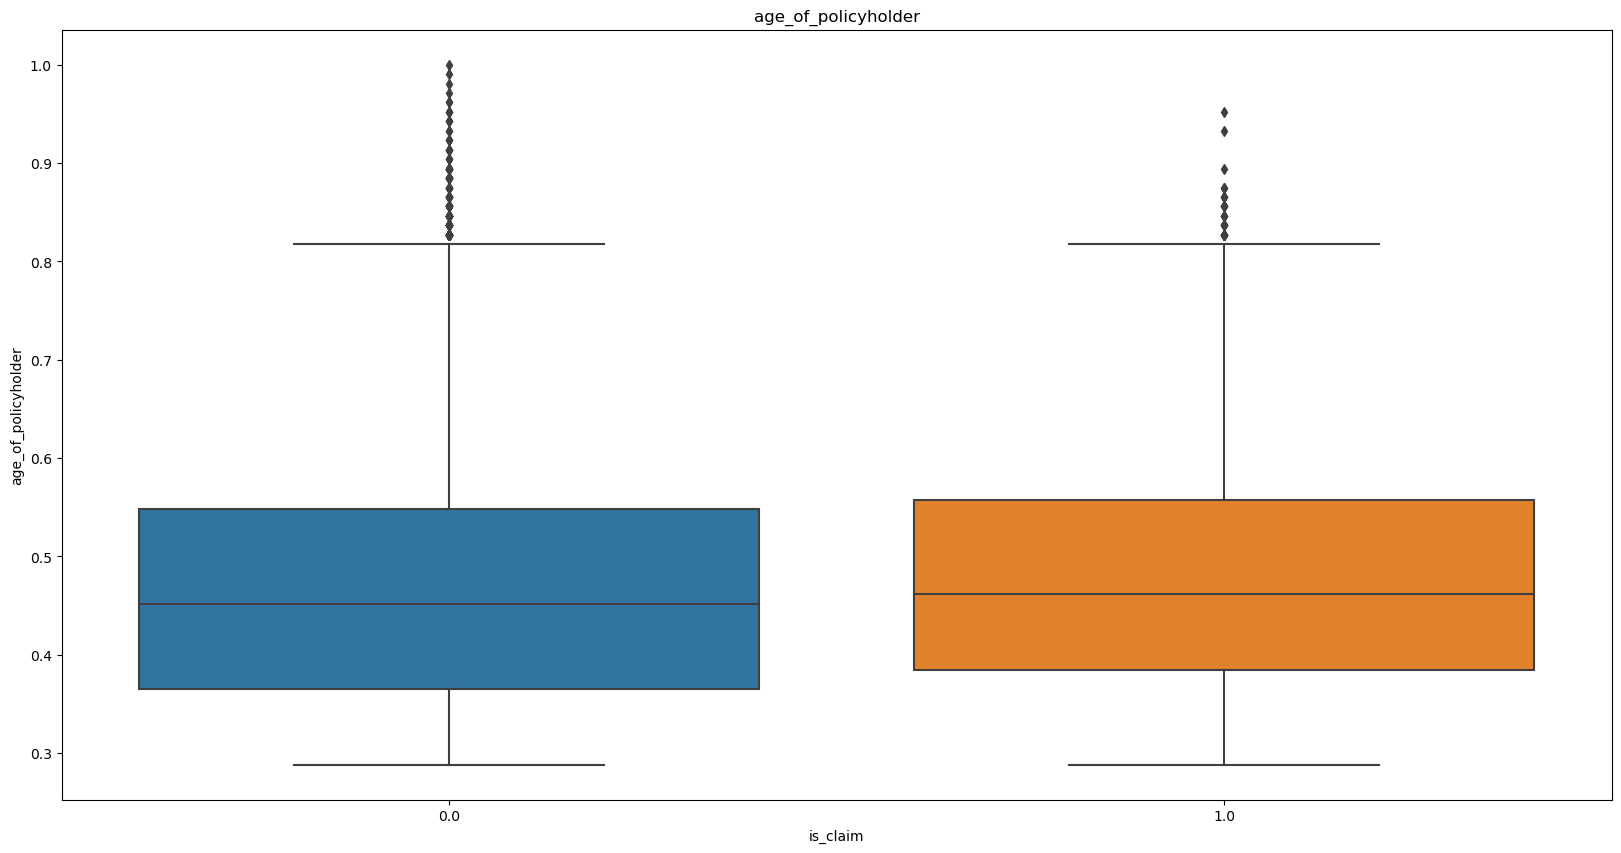

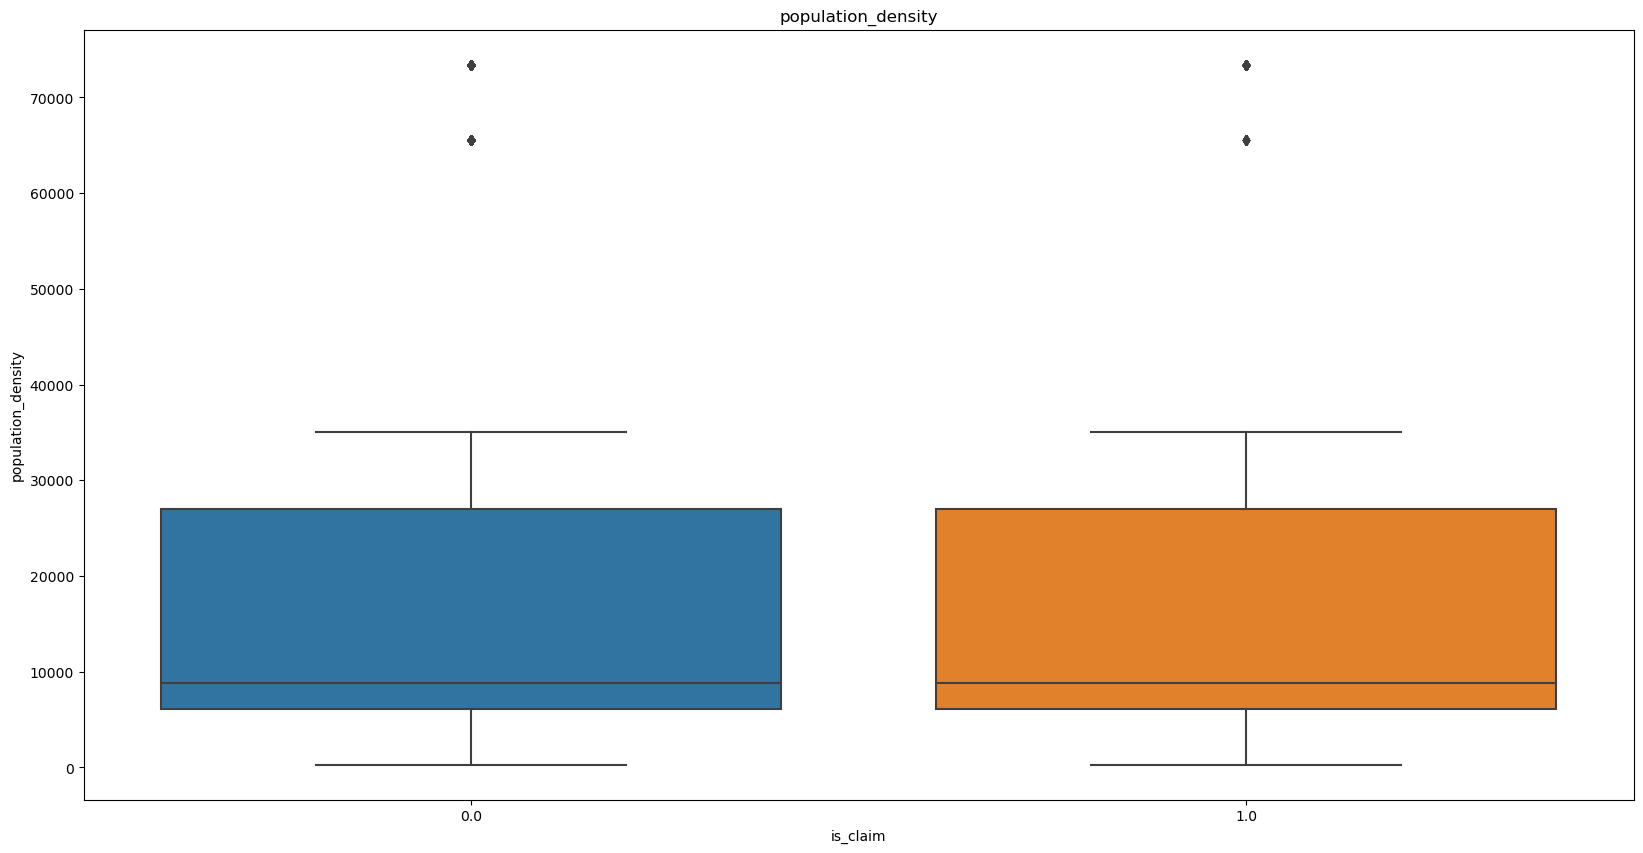

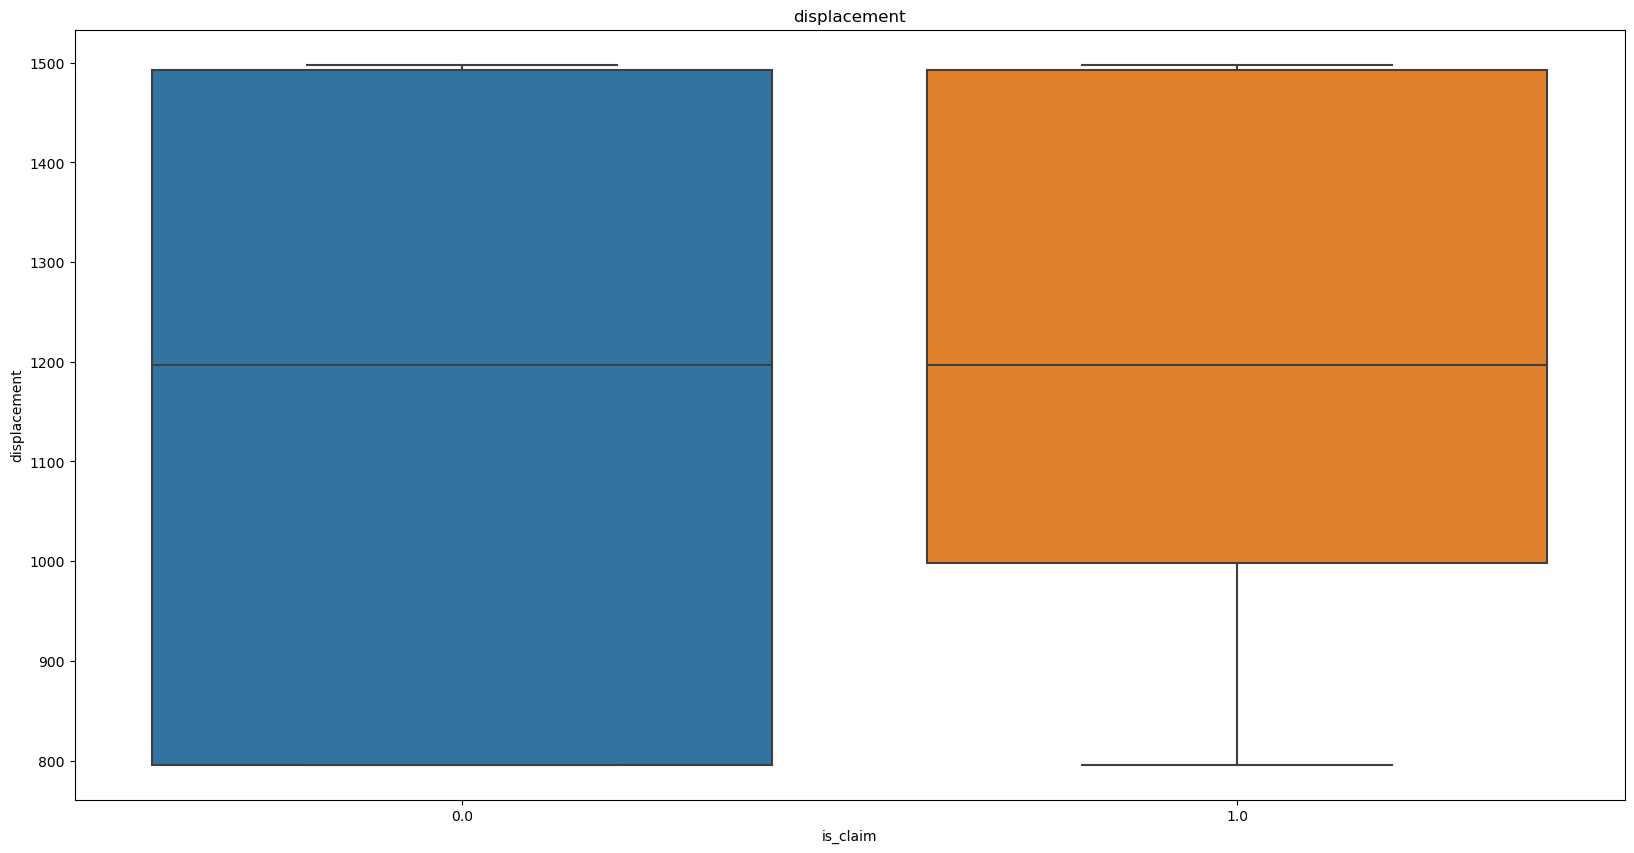

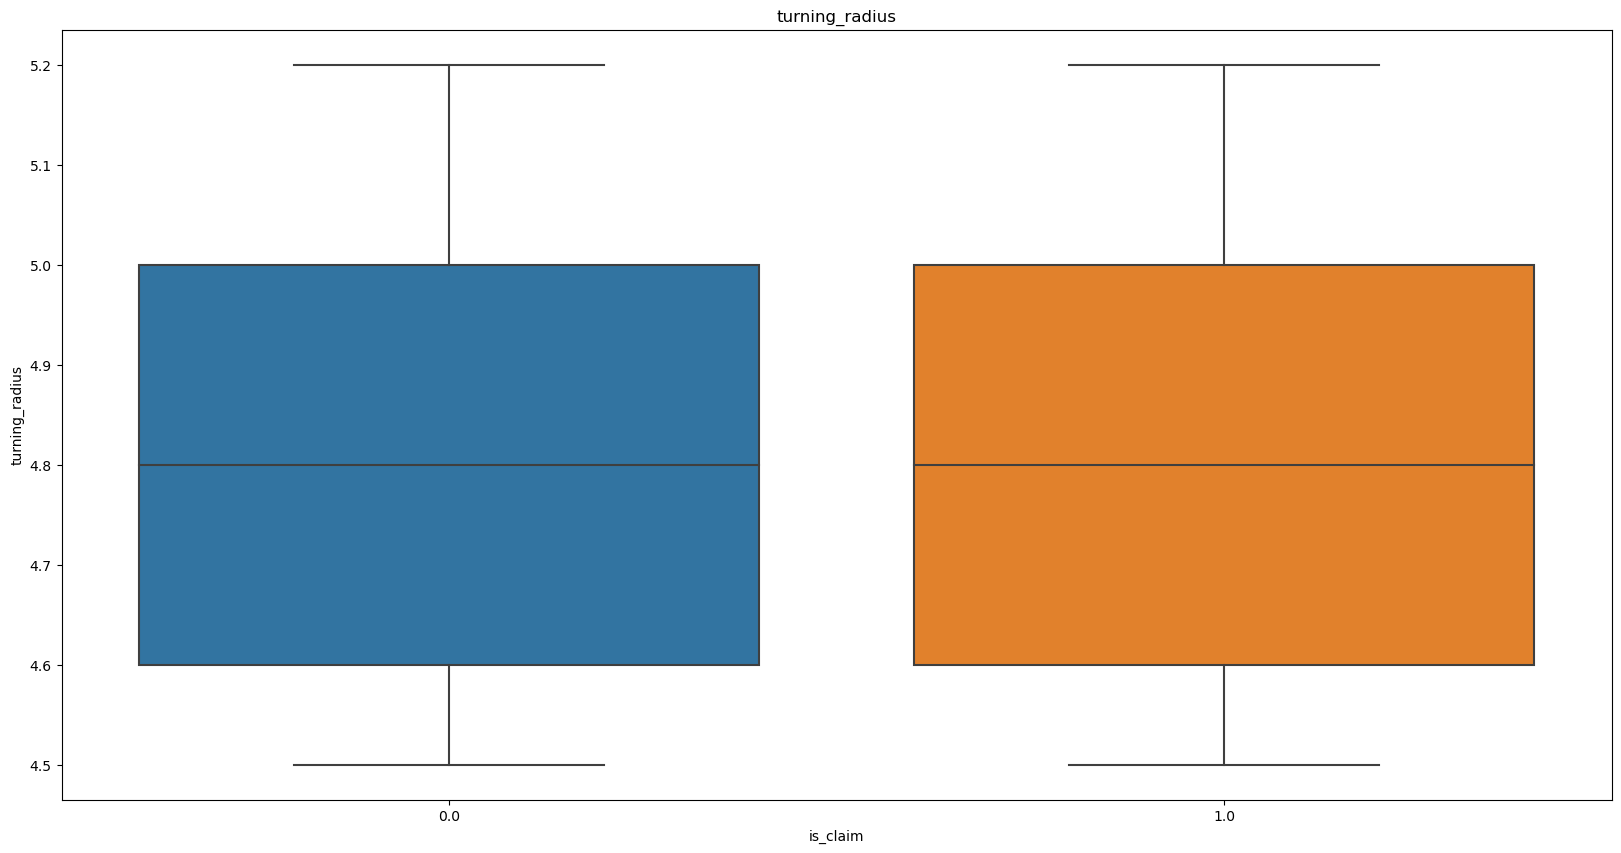

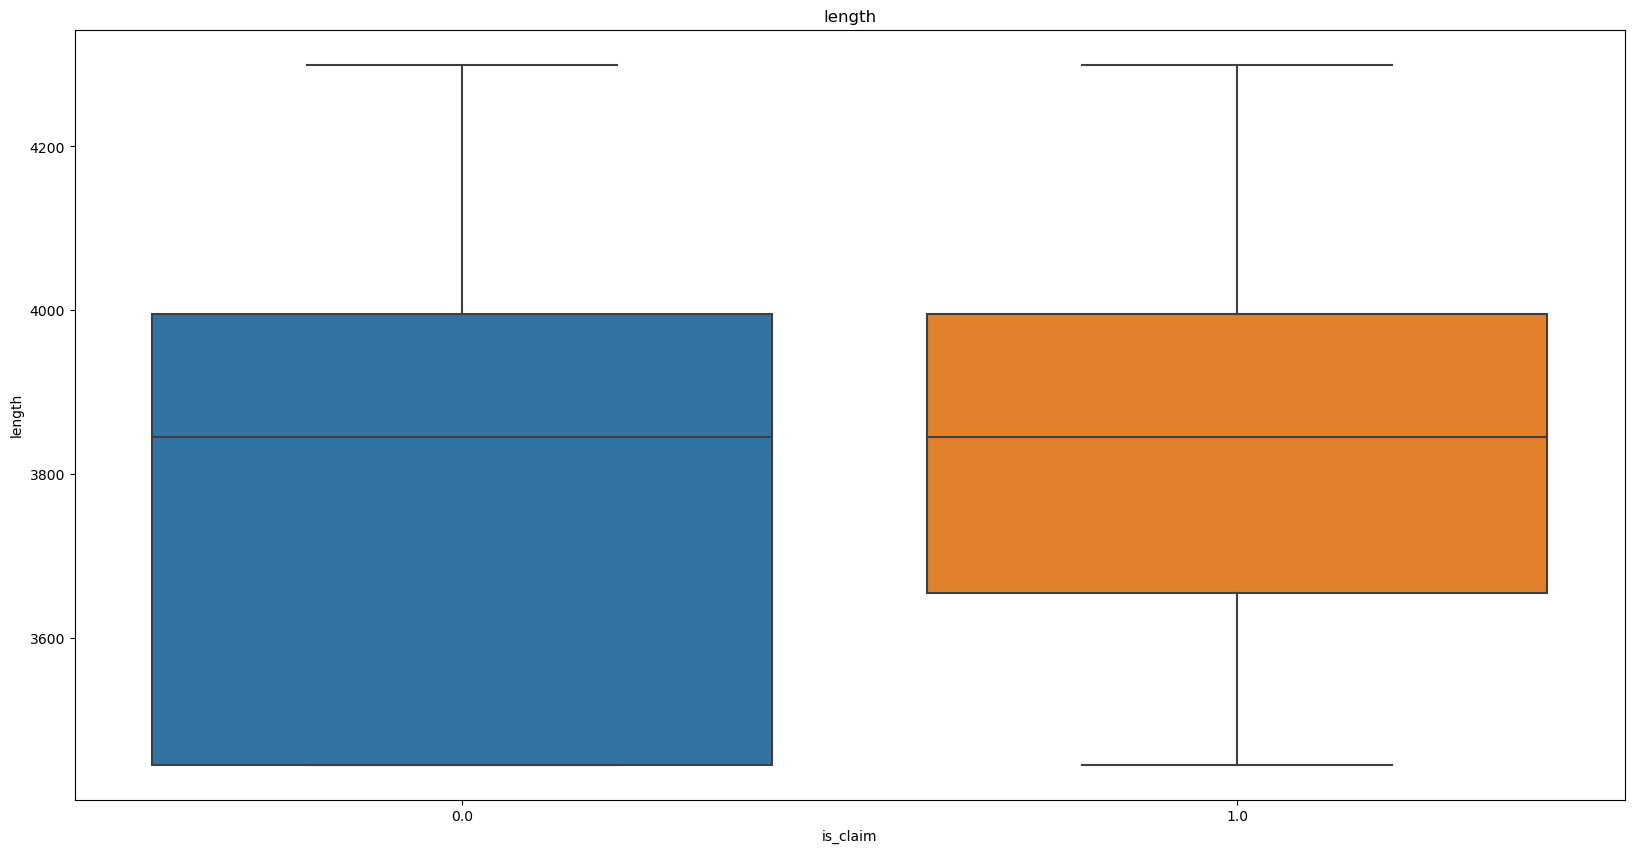

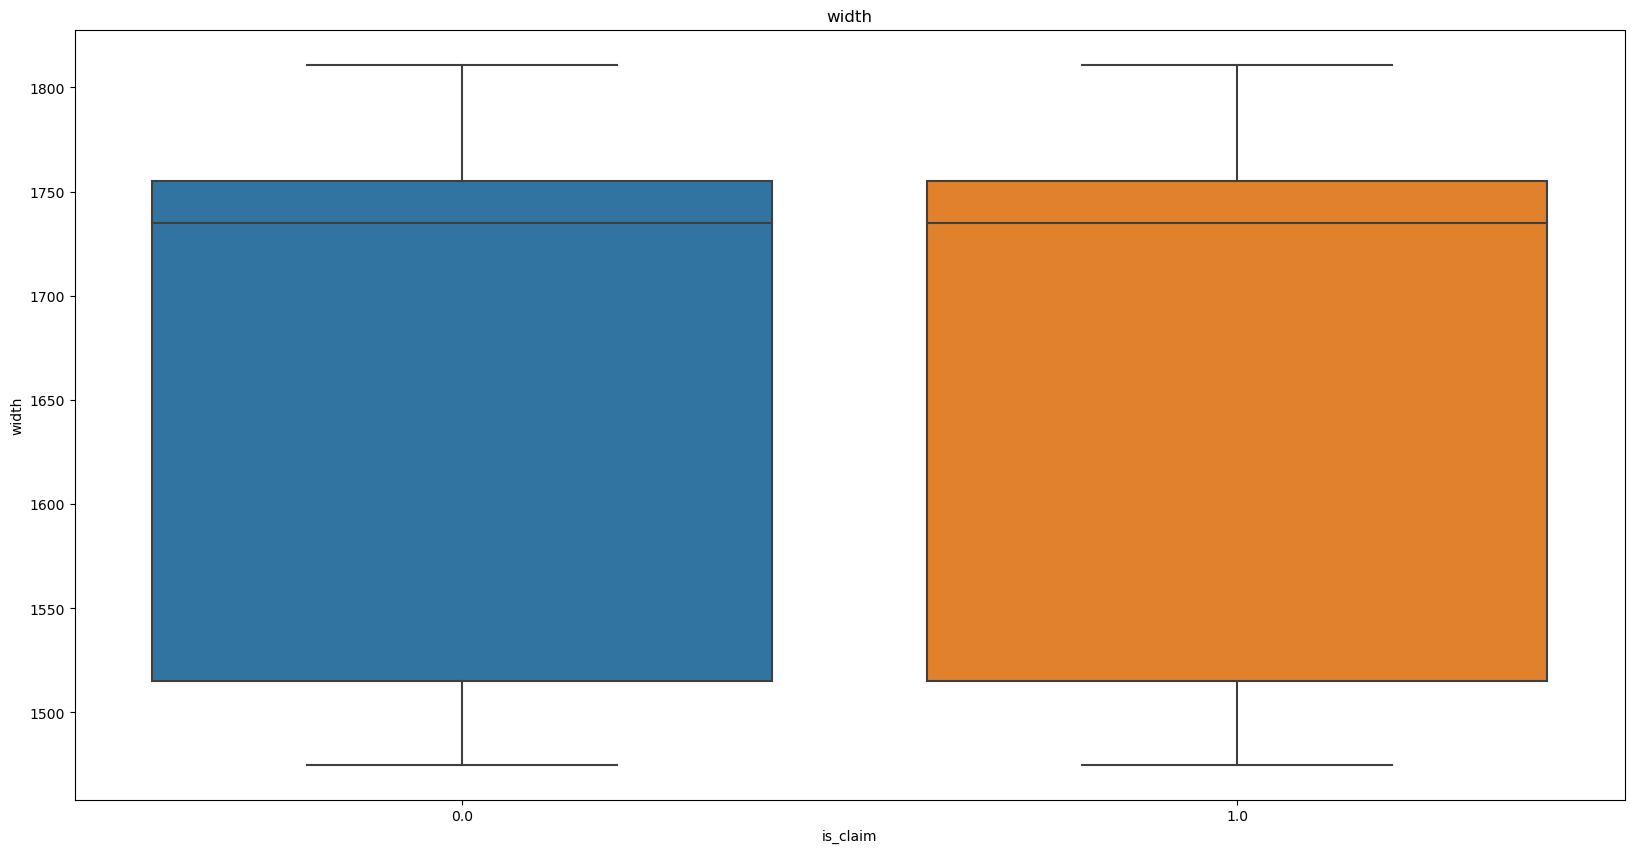

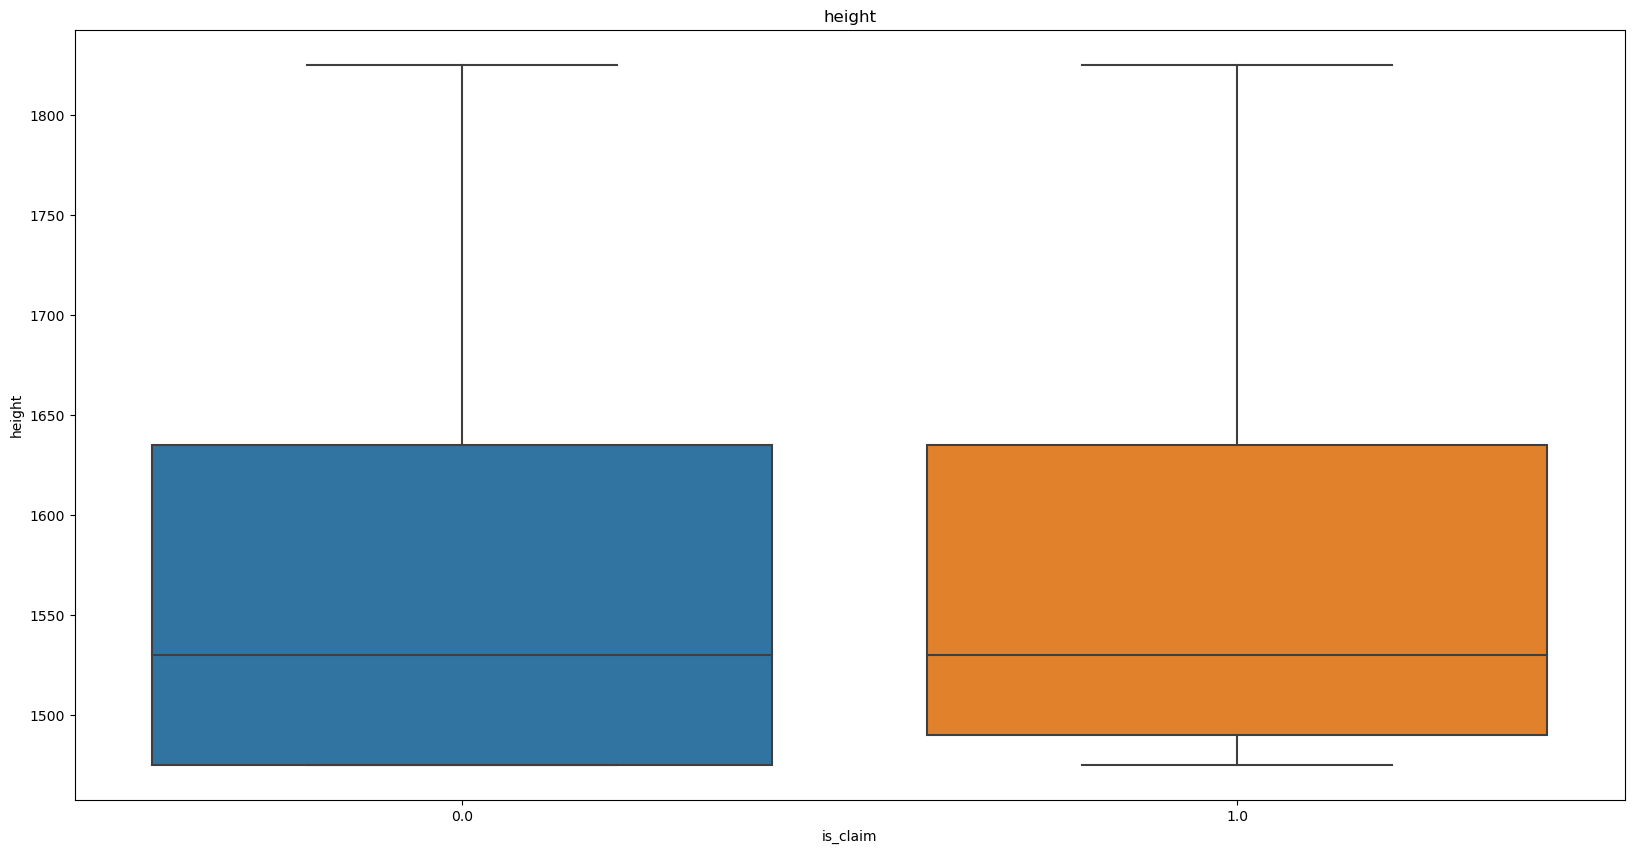

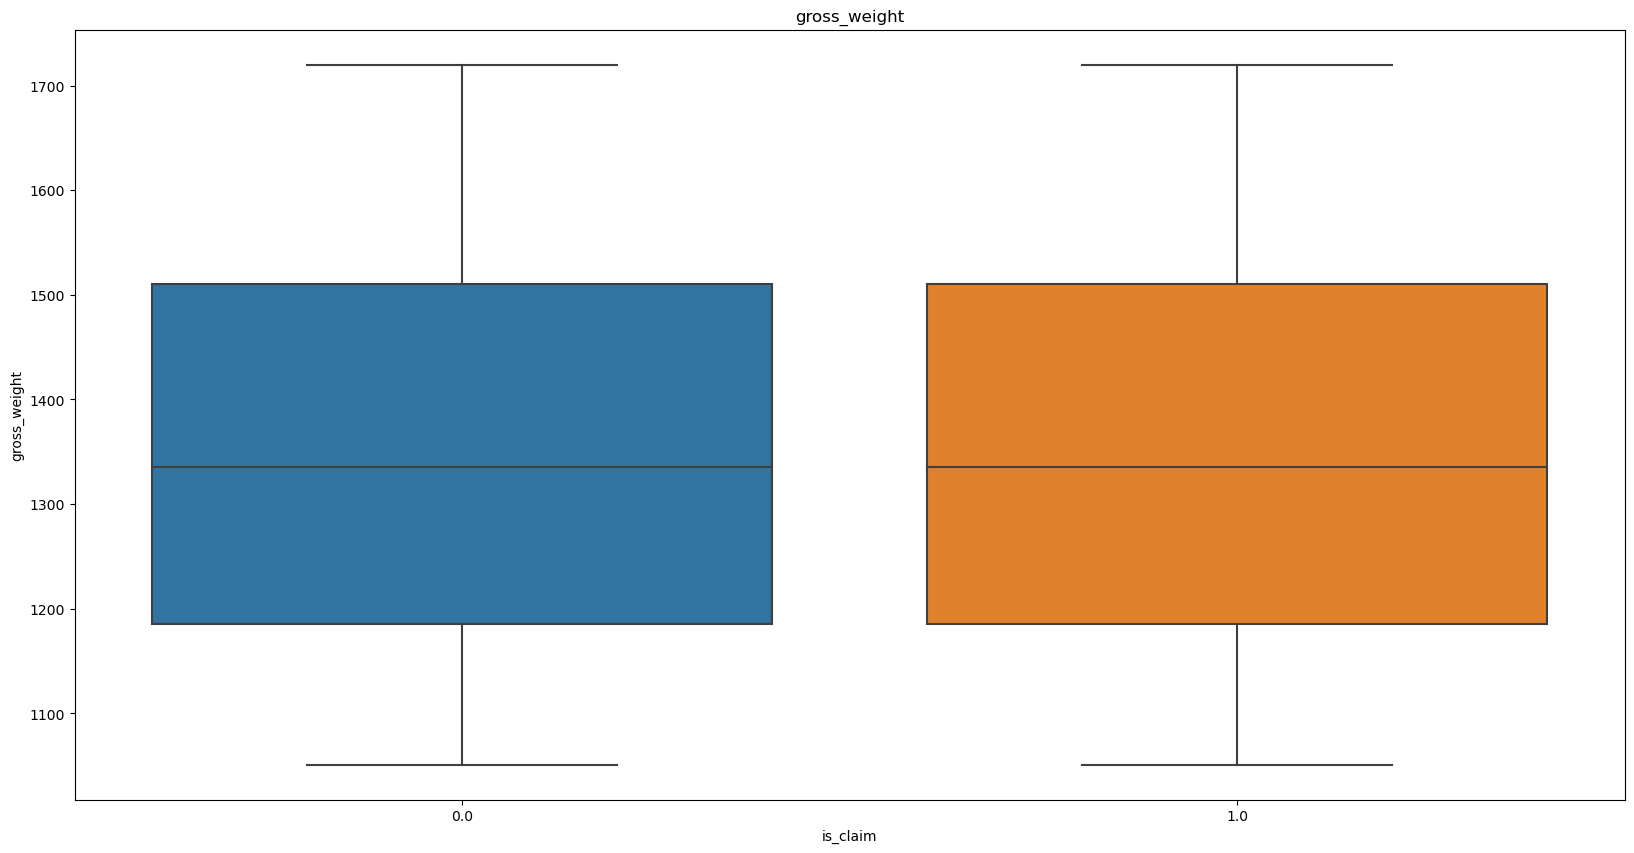

In [32]:
# bivariate analysis

for i in num_cols:
    sns.boxplot(com["is_claim"],com.loc[:,i])
    plt.title(i)
    plt.show()

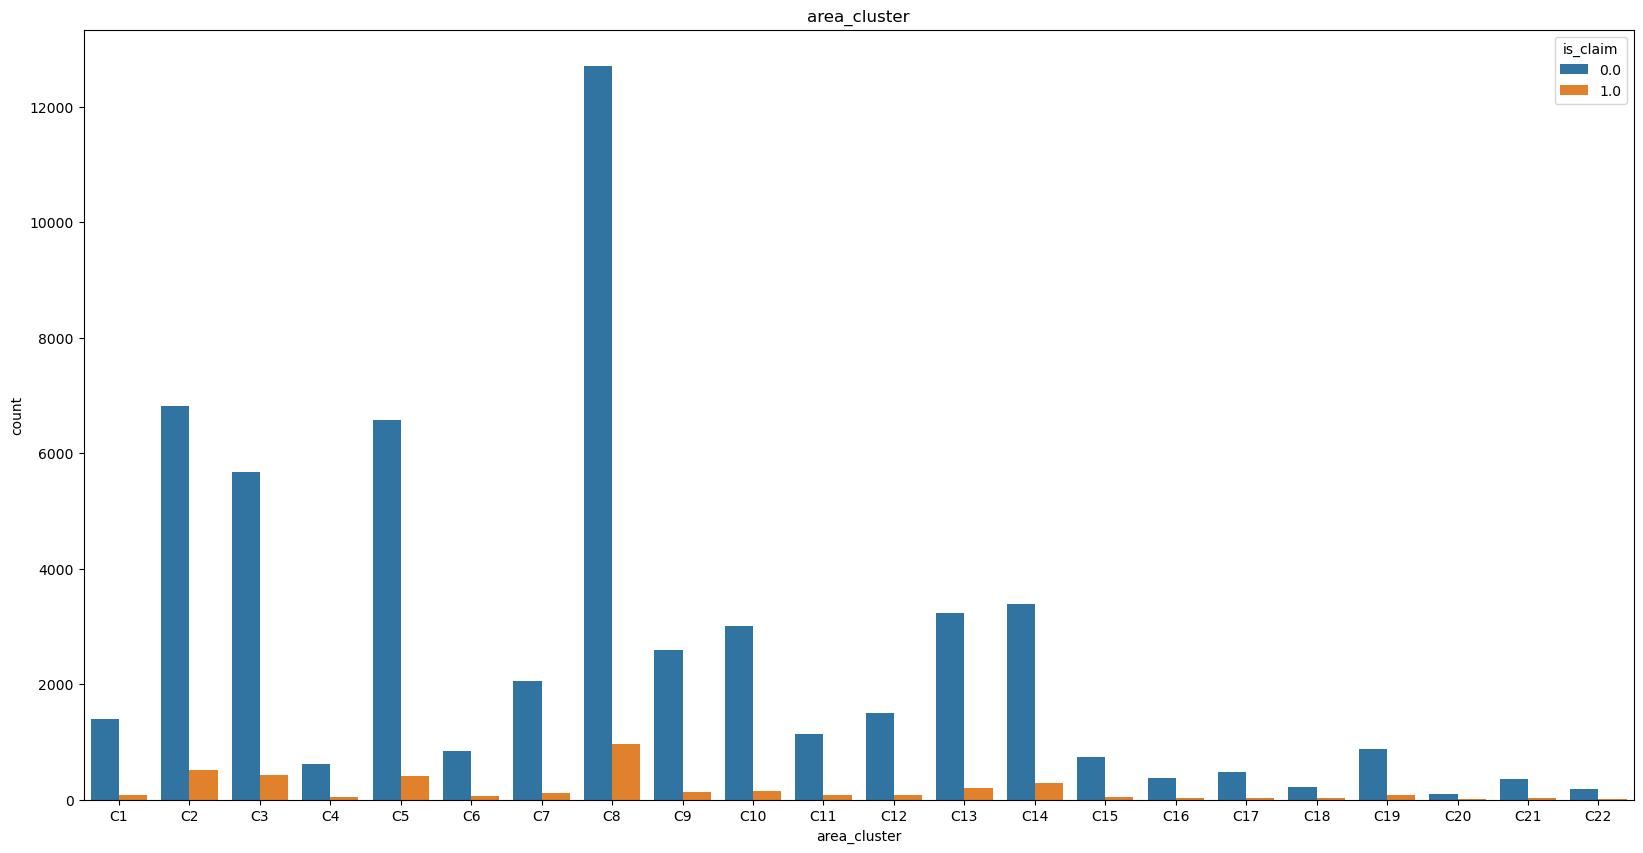

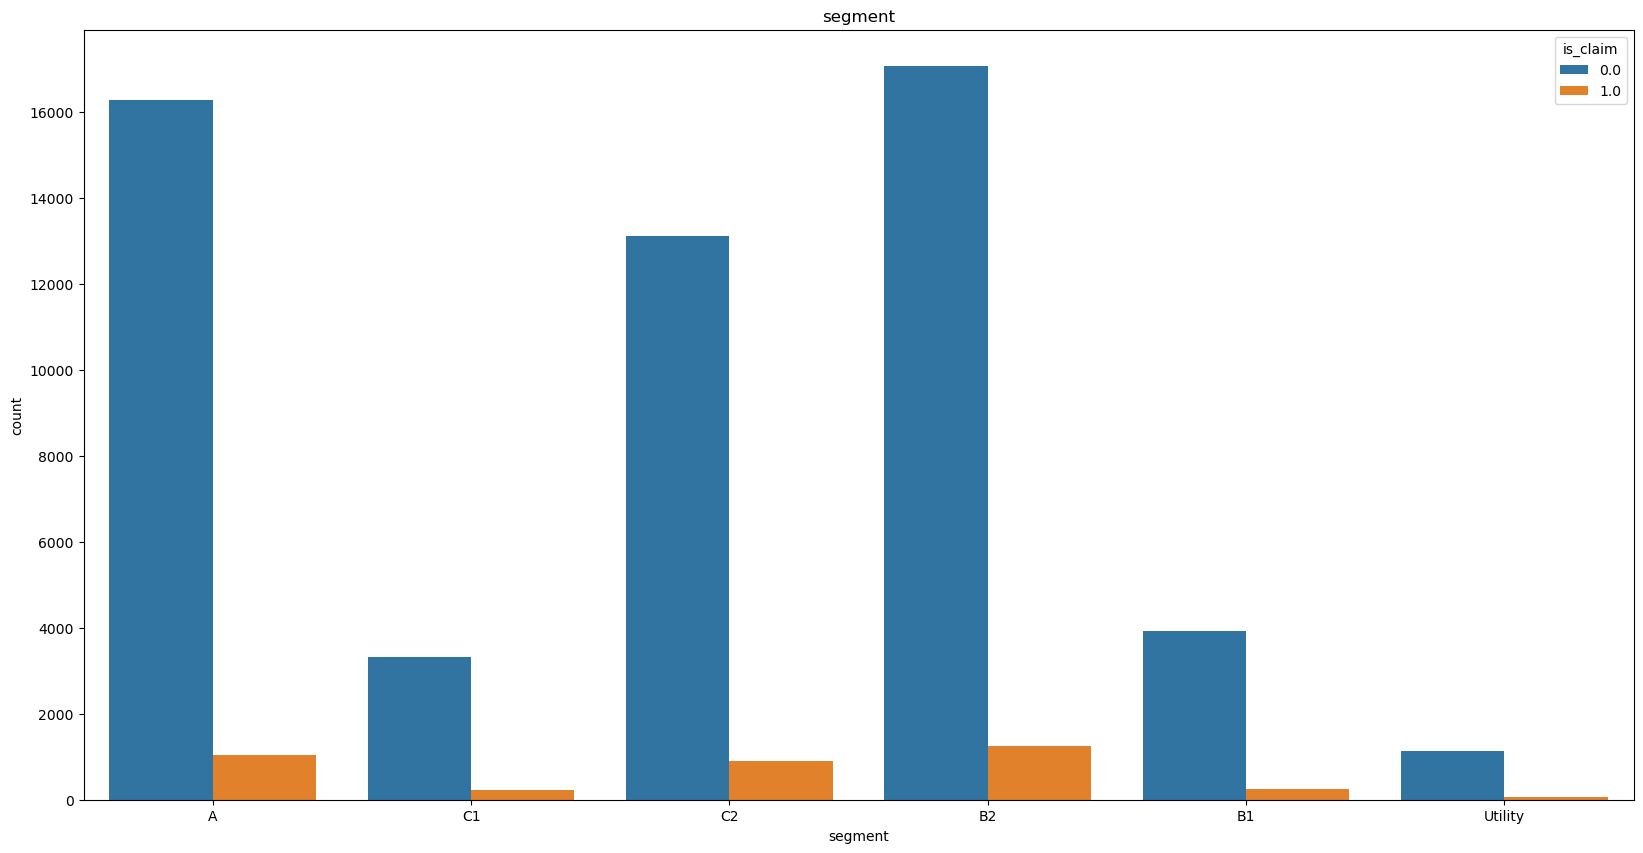

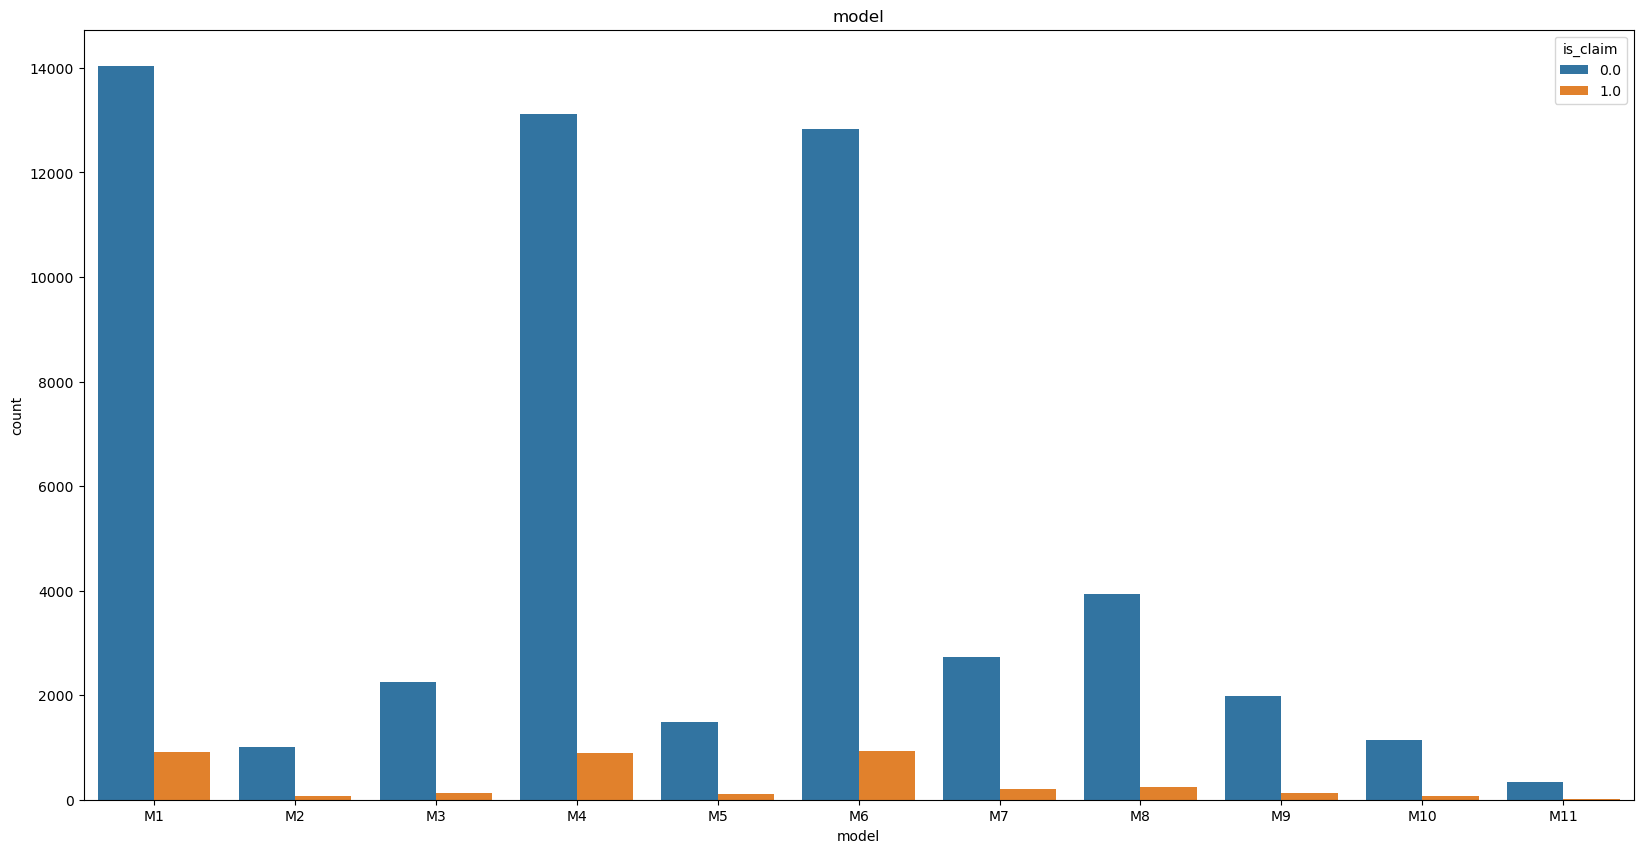

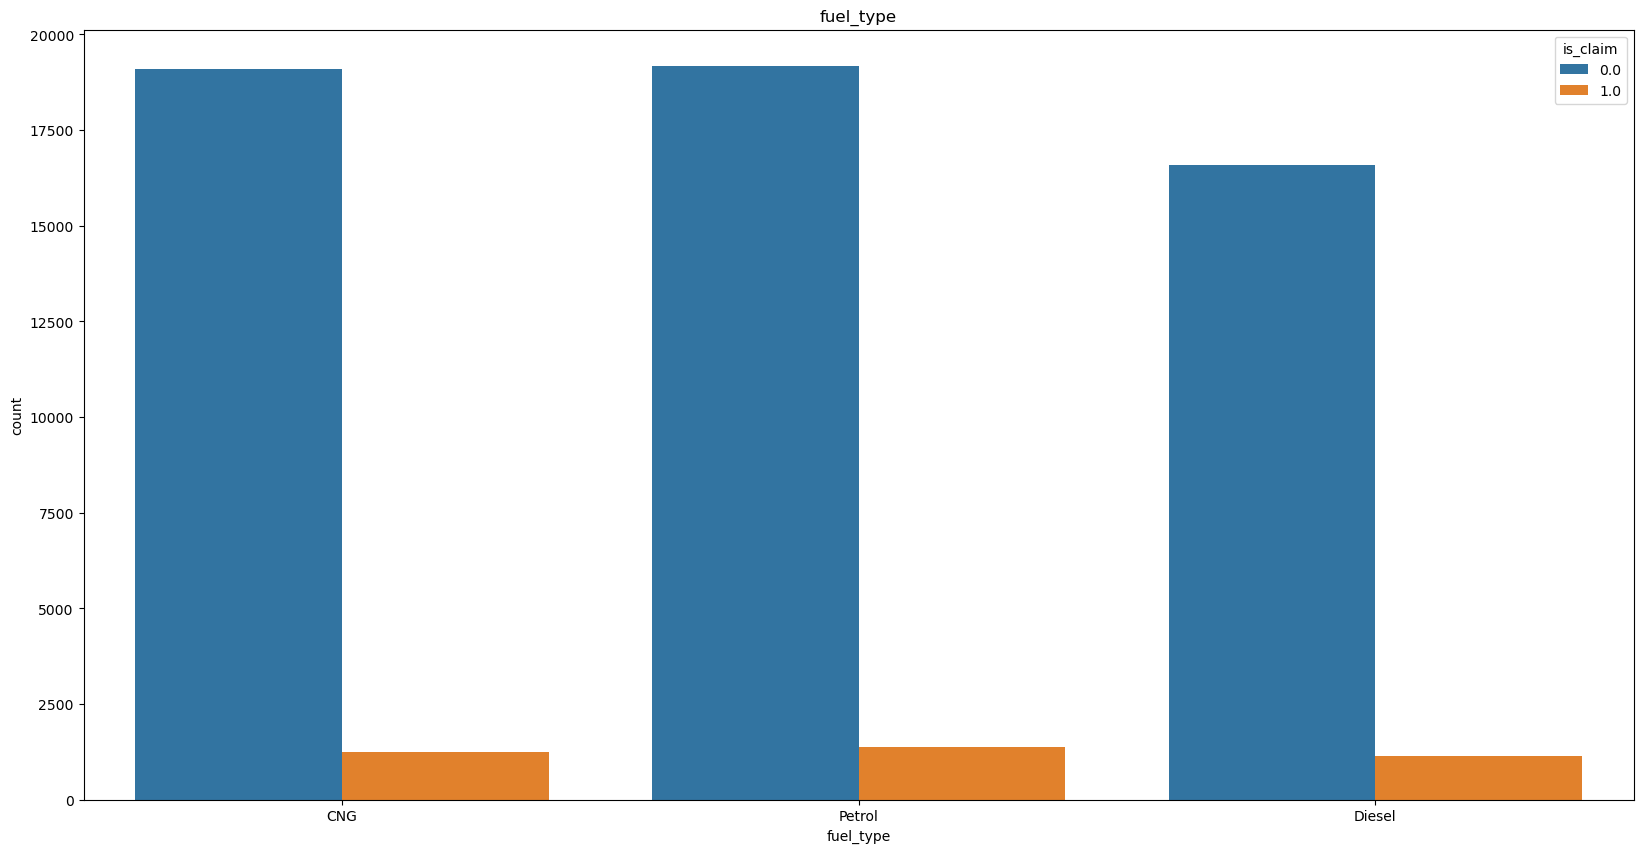

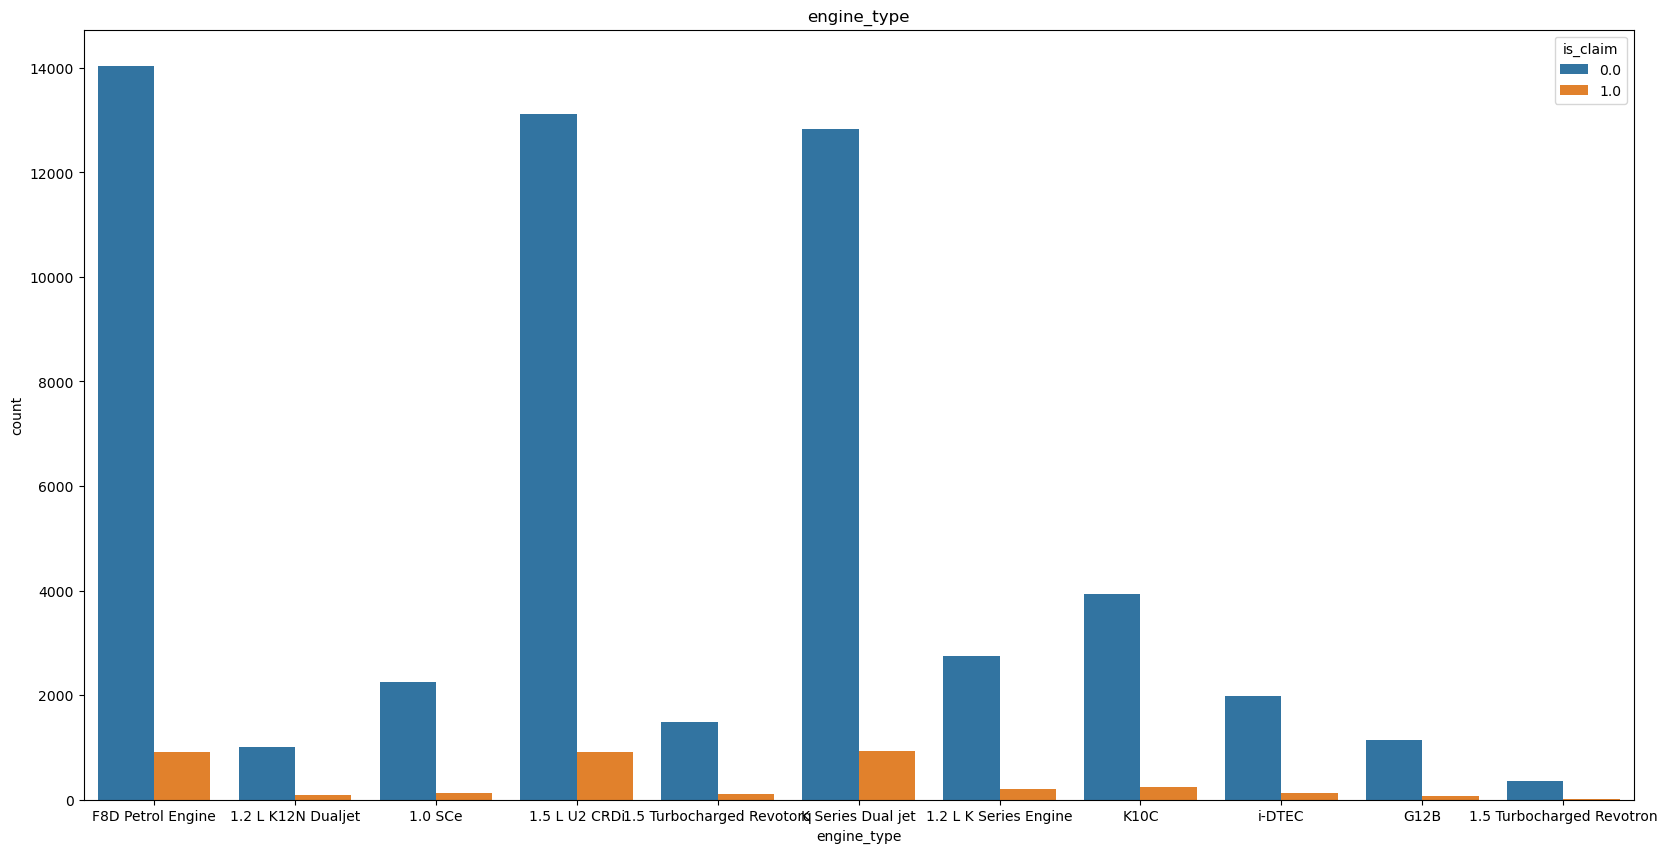

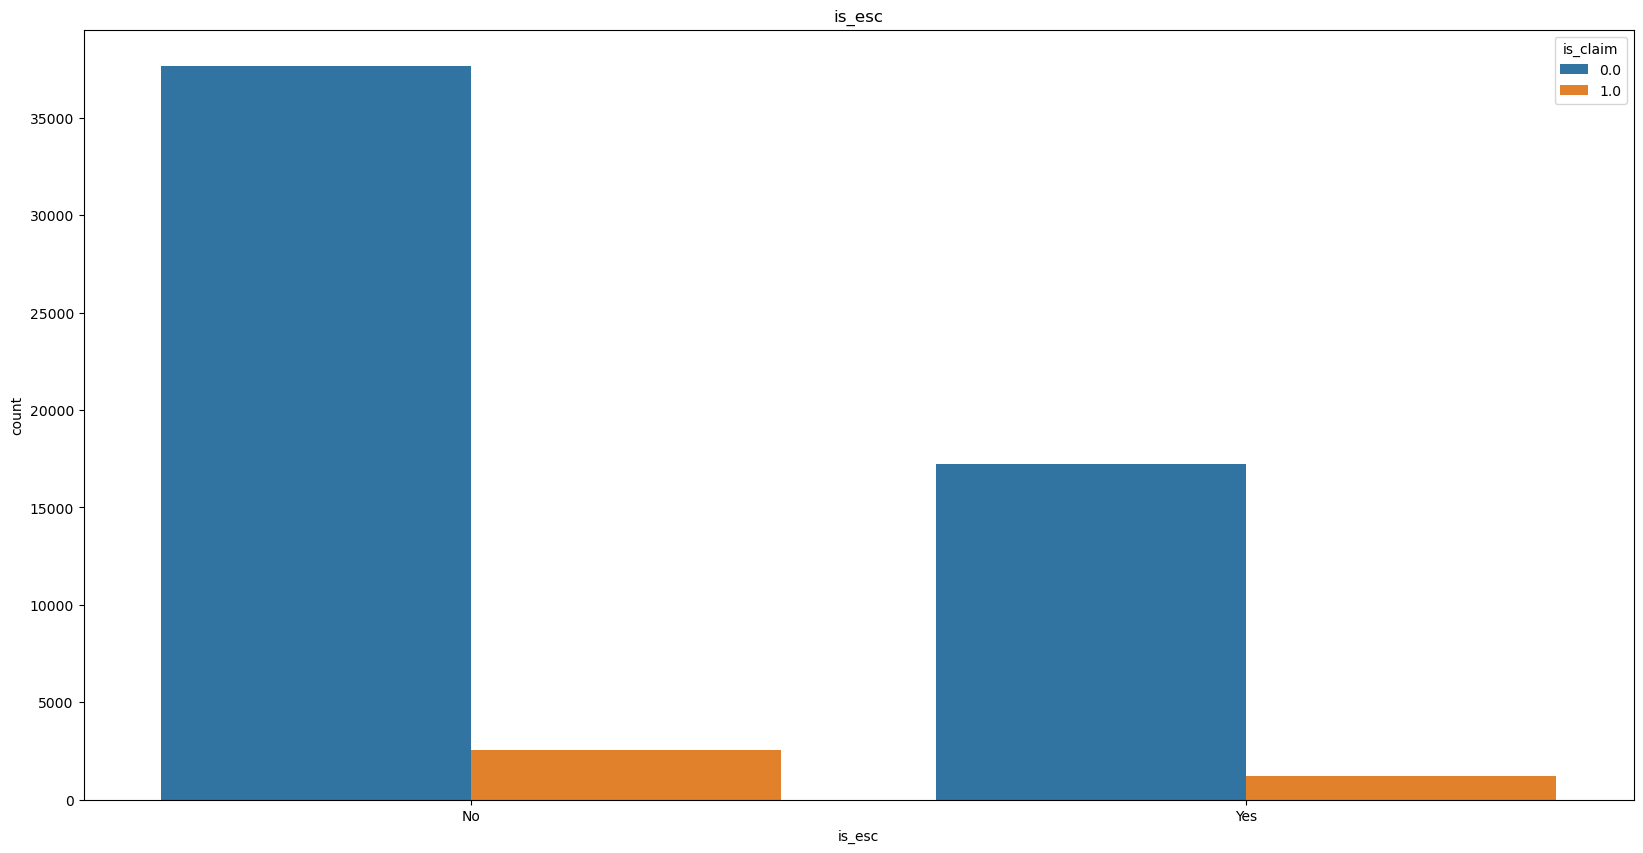

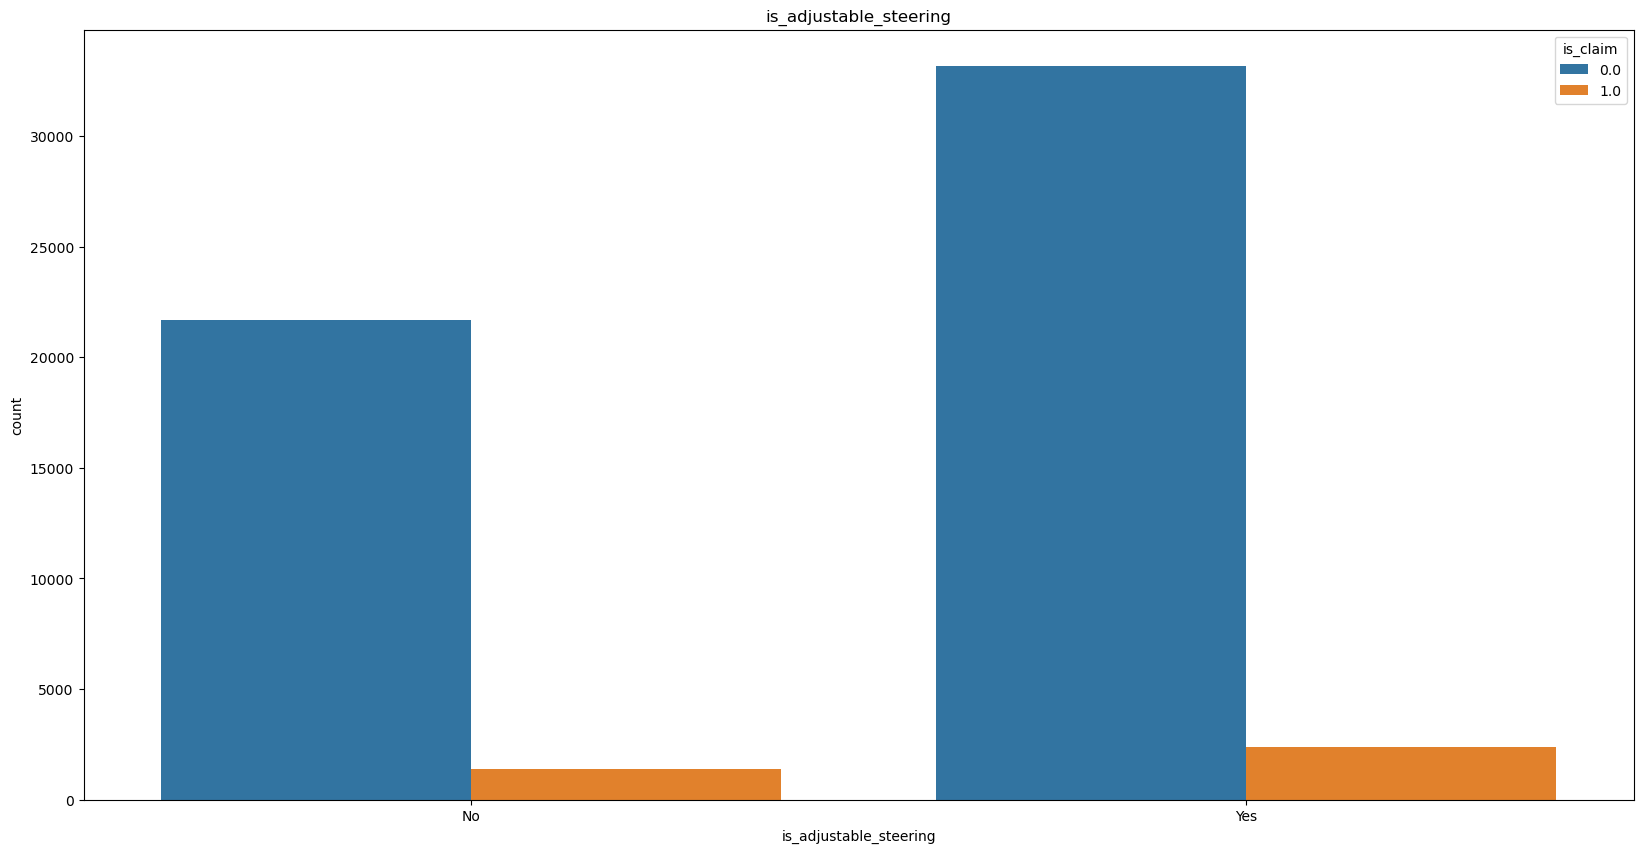

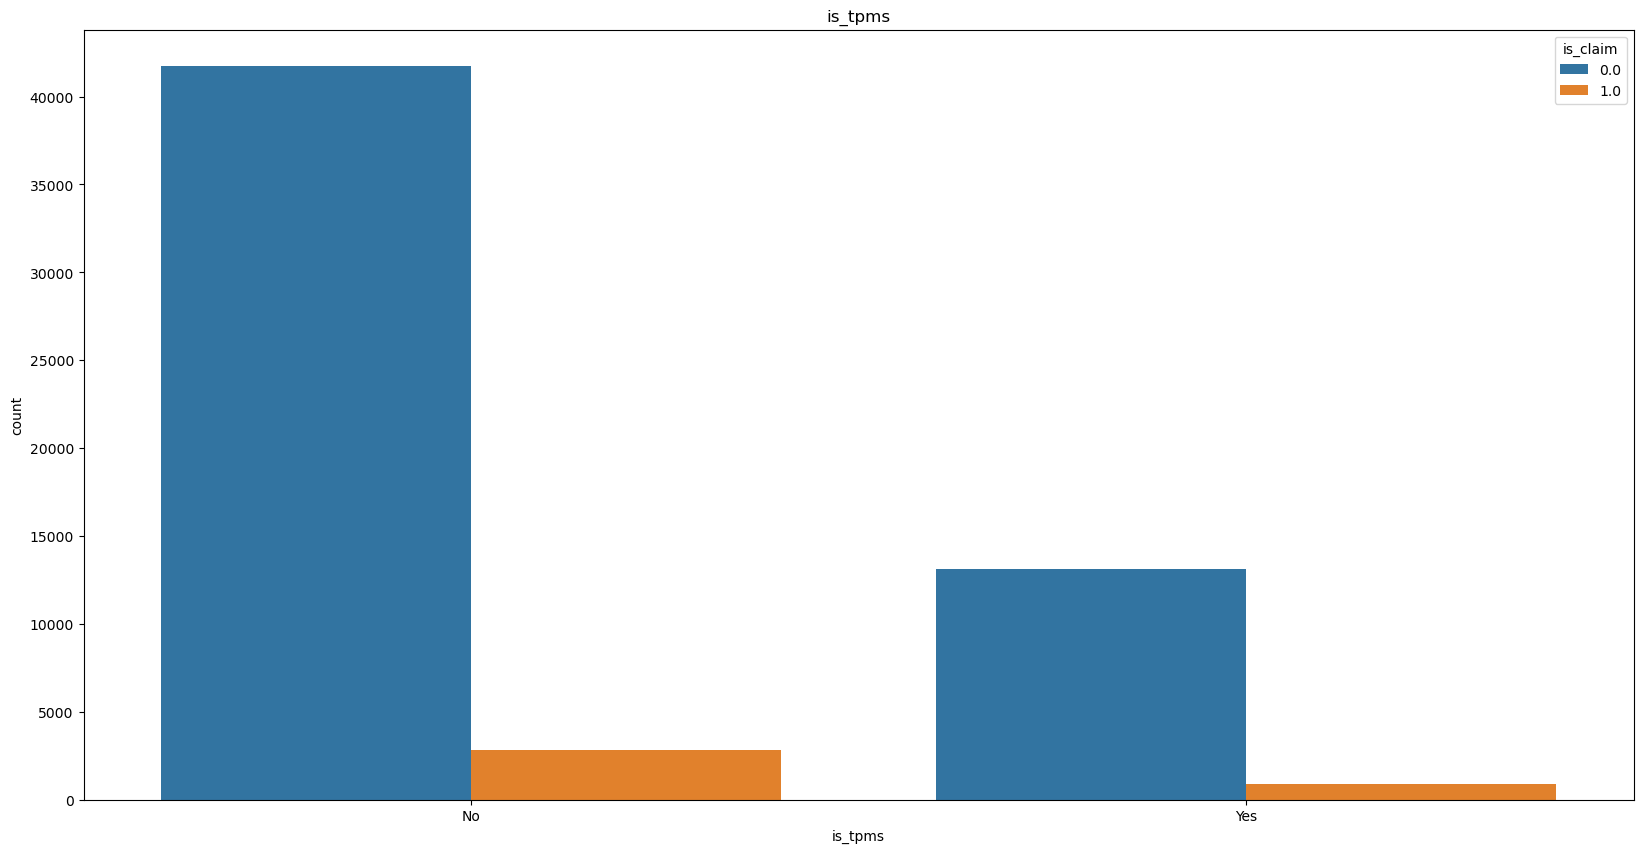

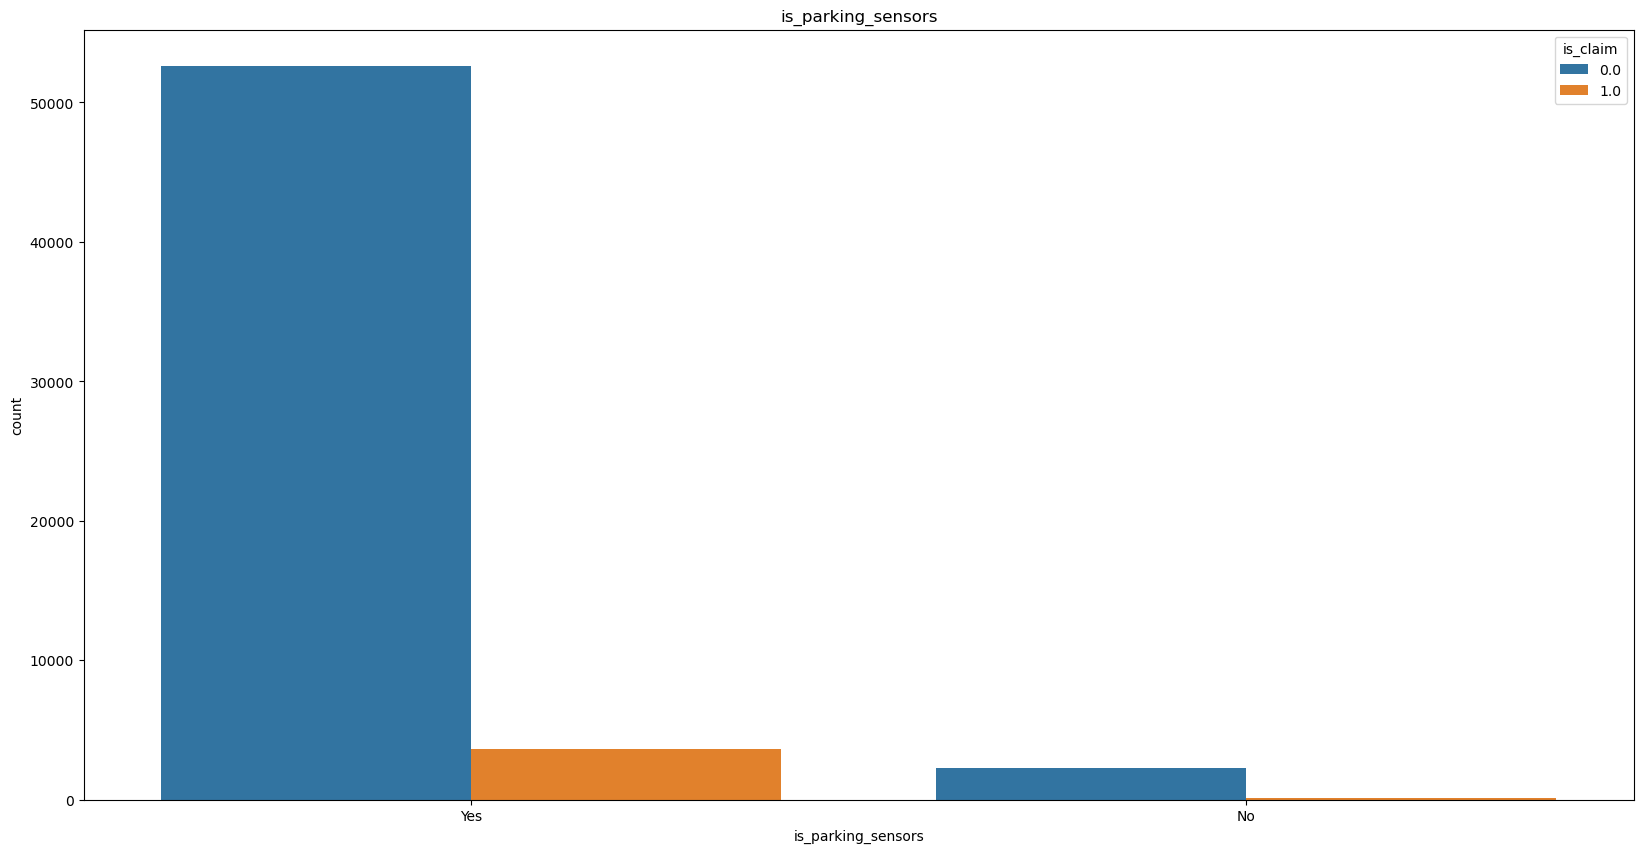

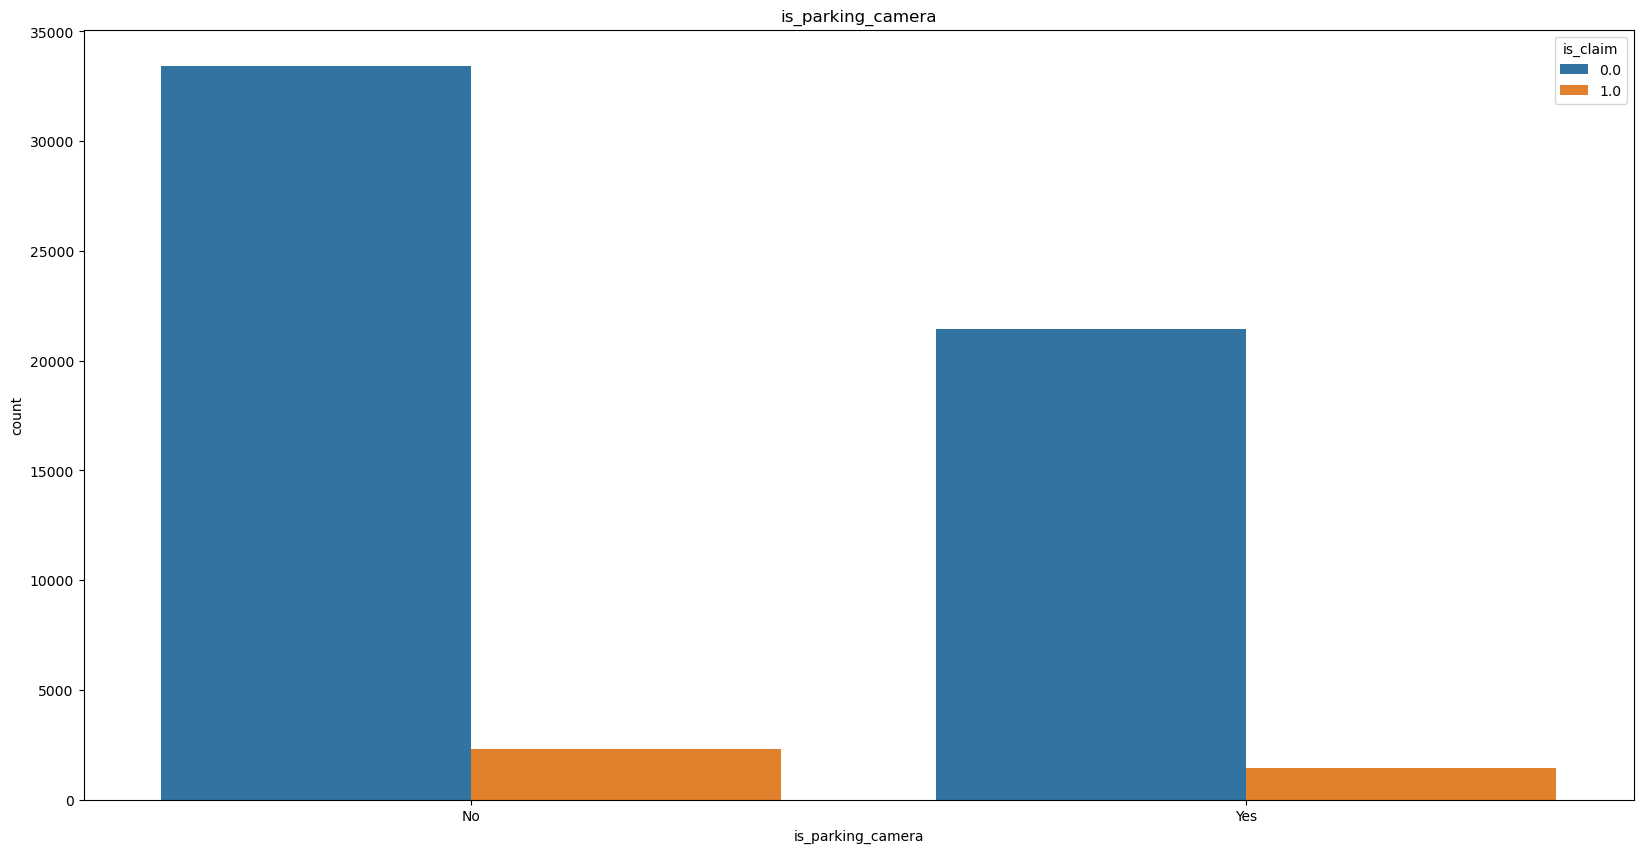

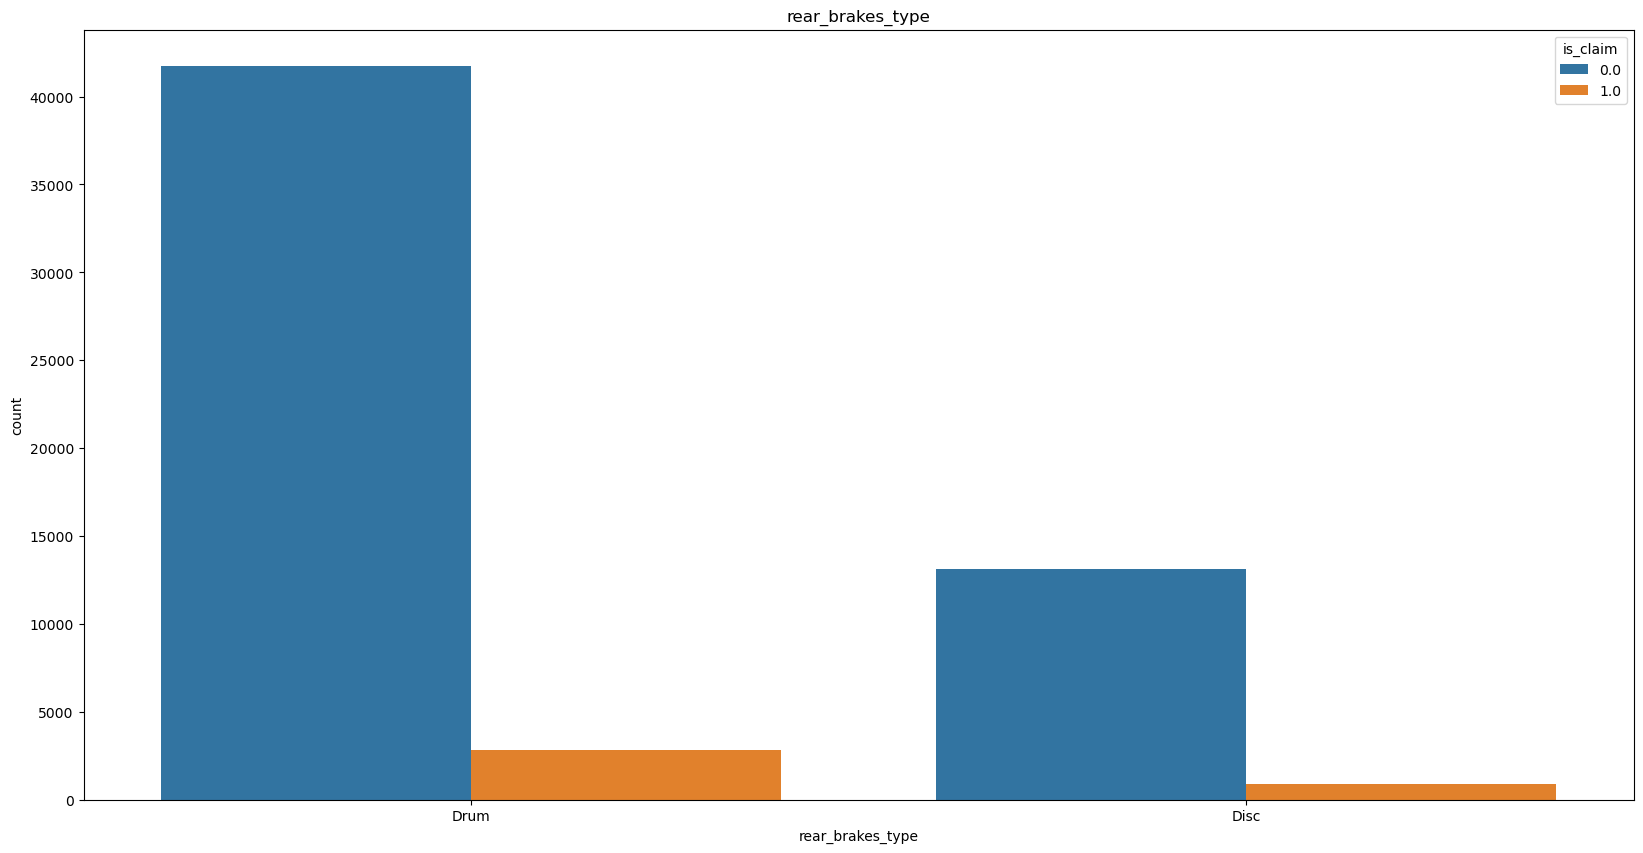

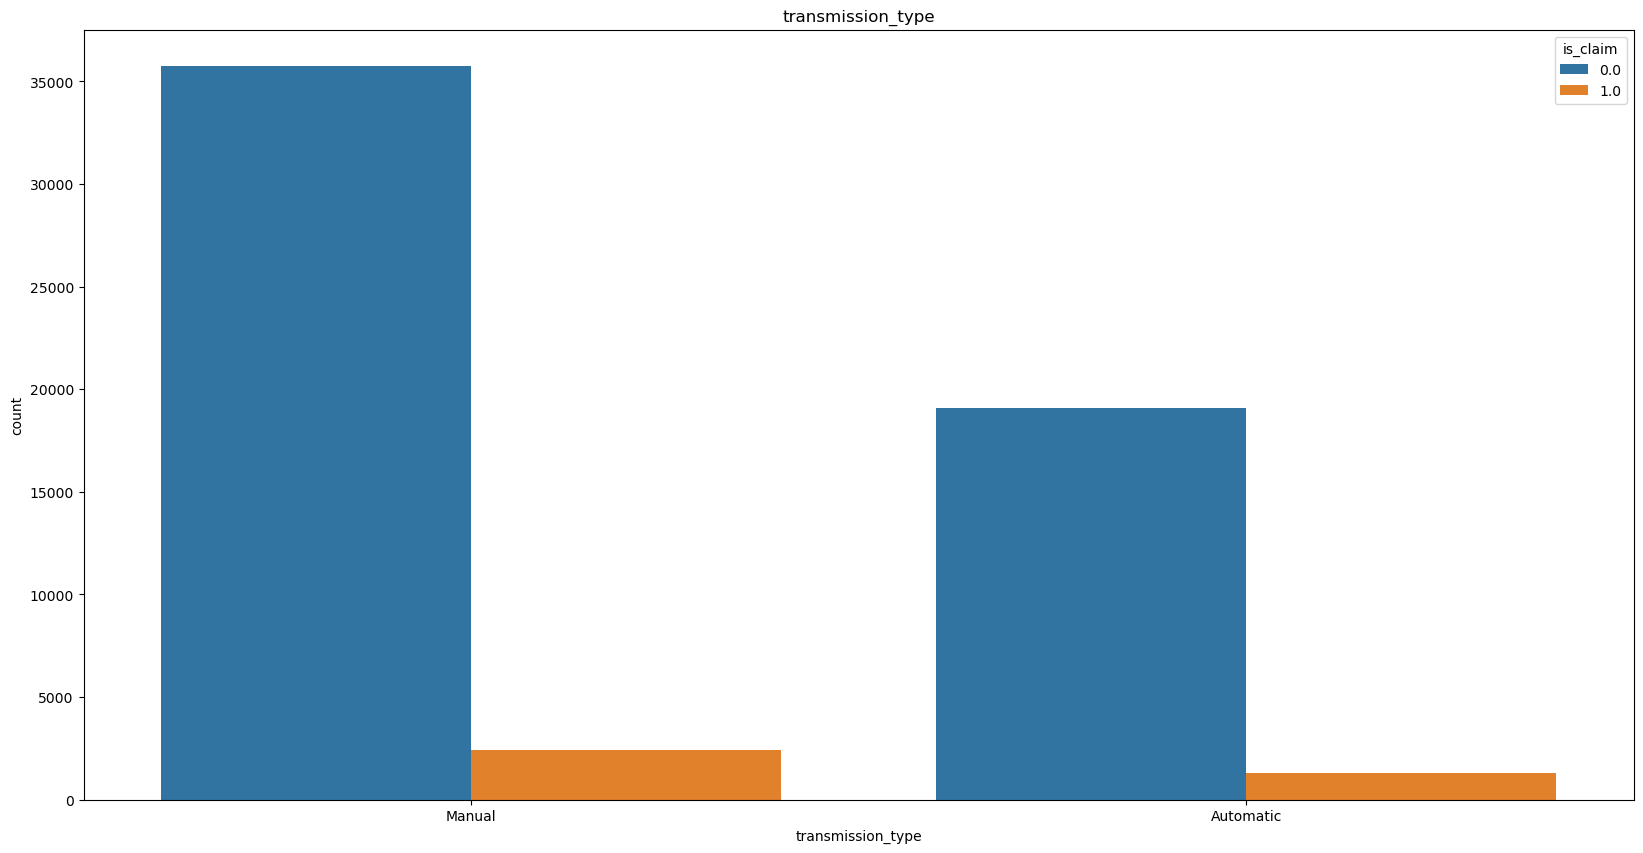

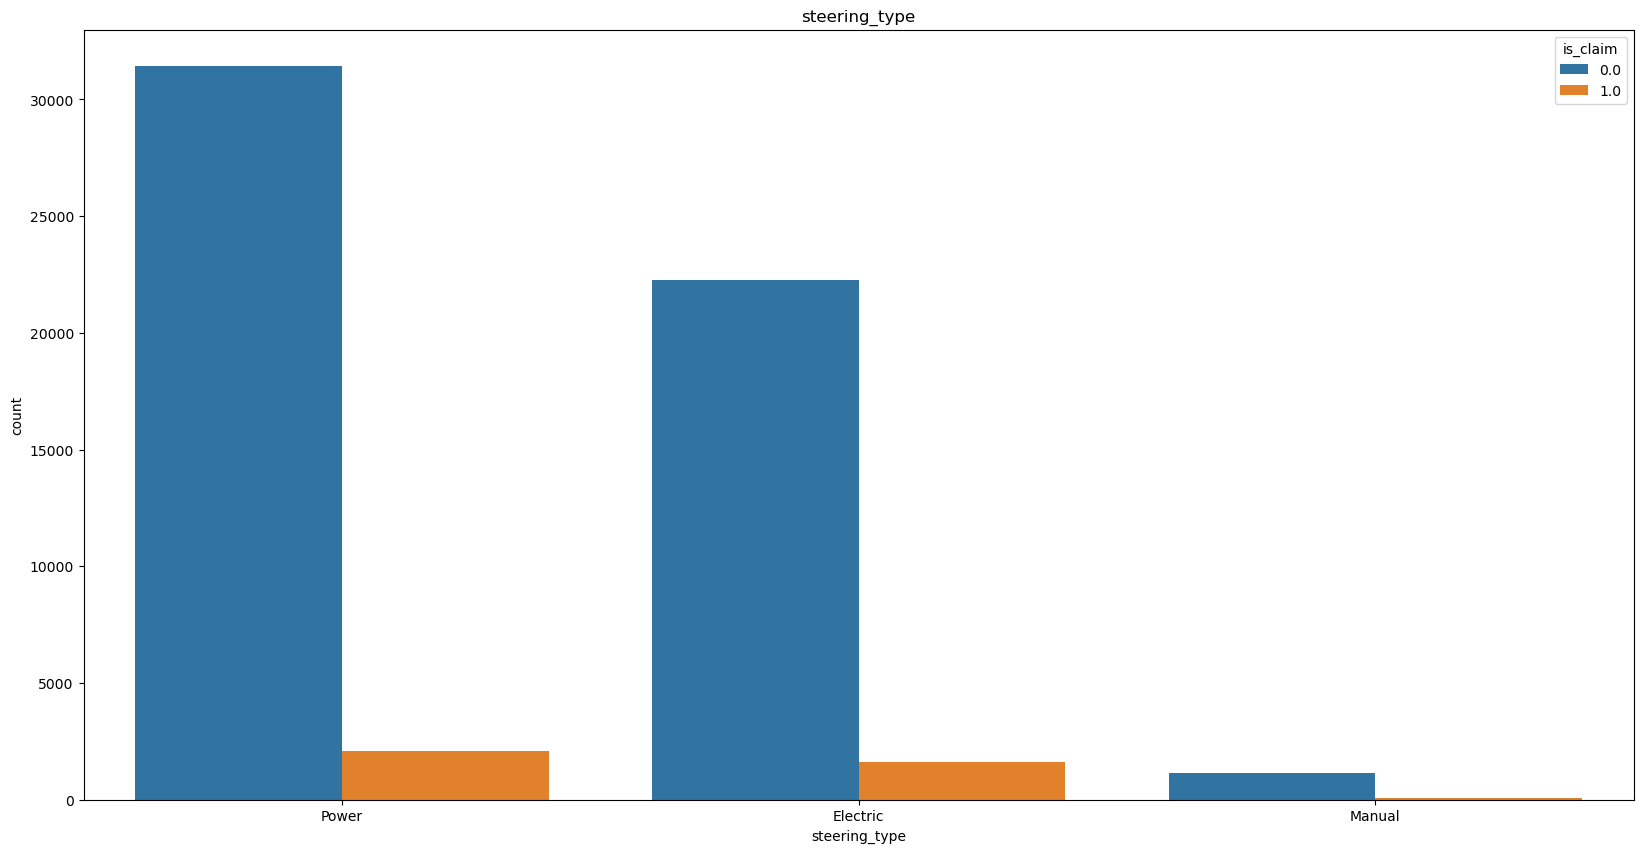

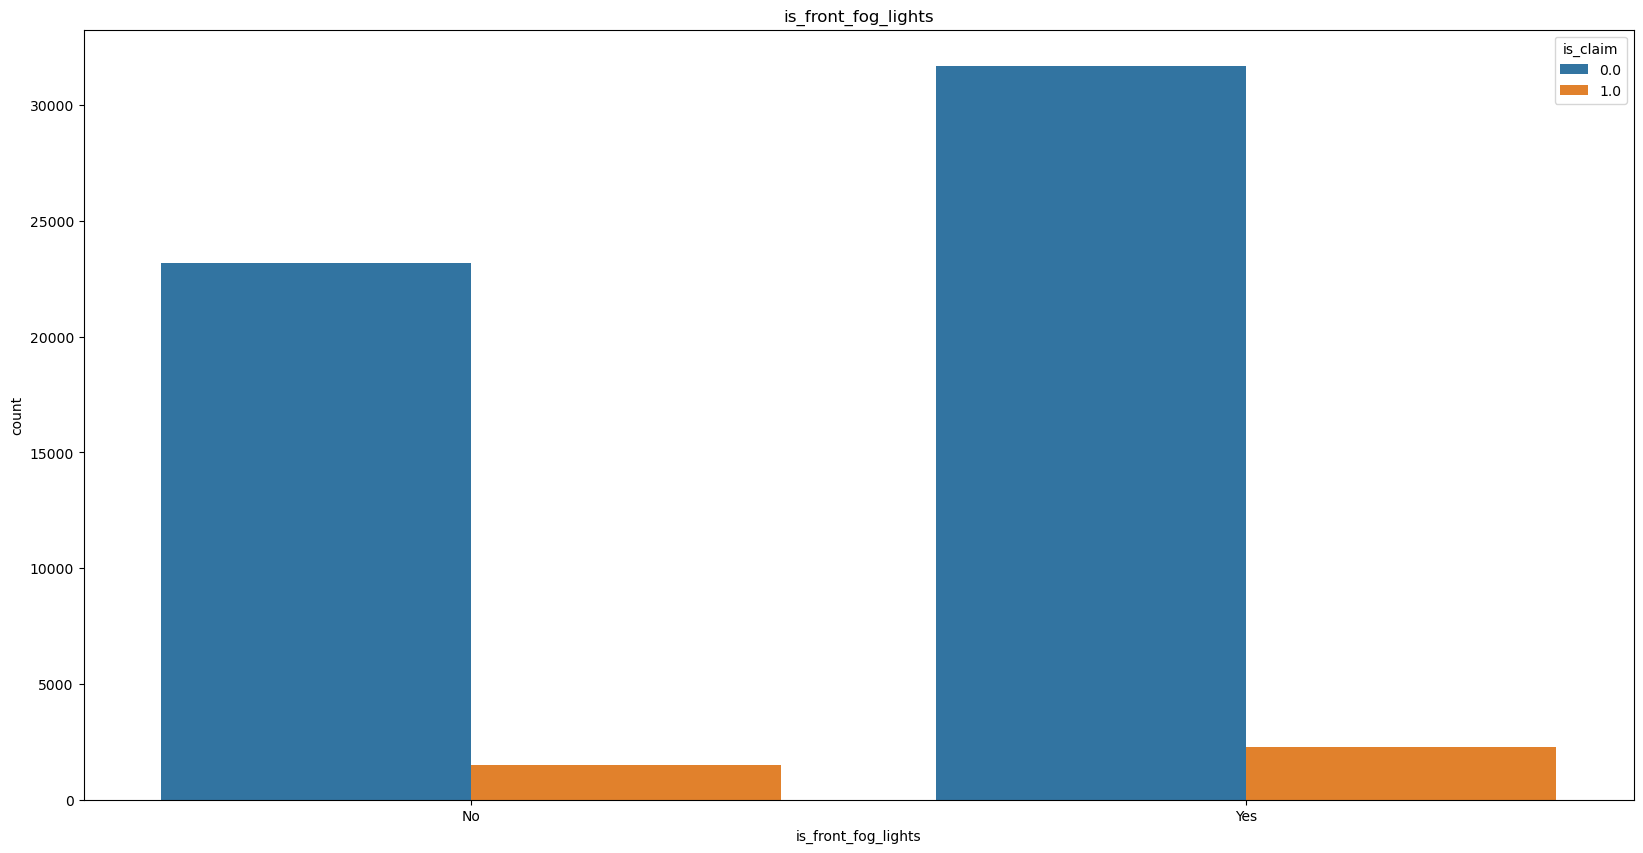

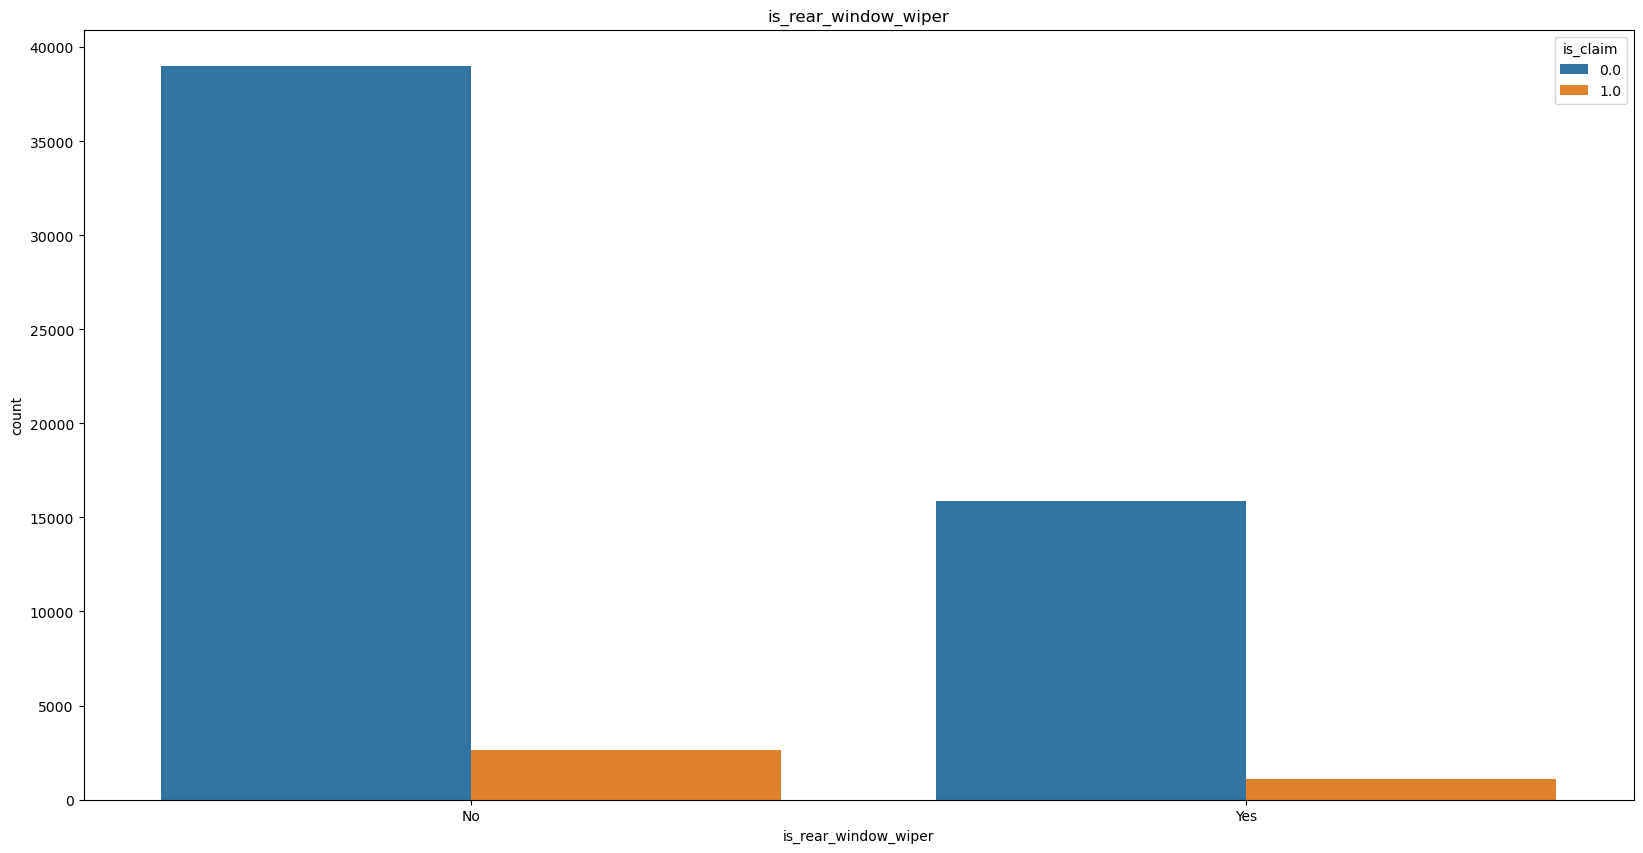

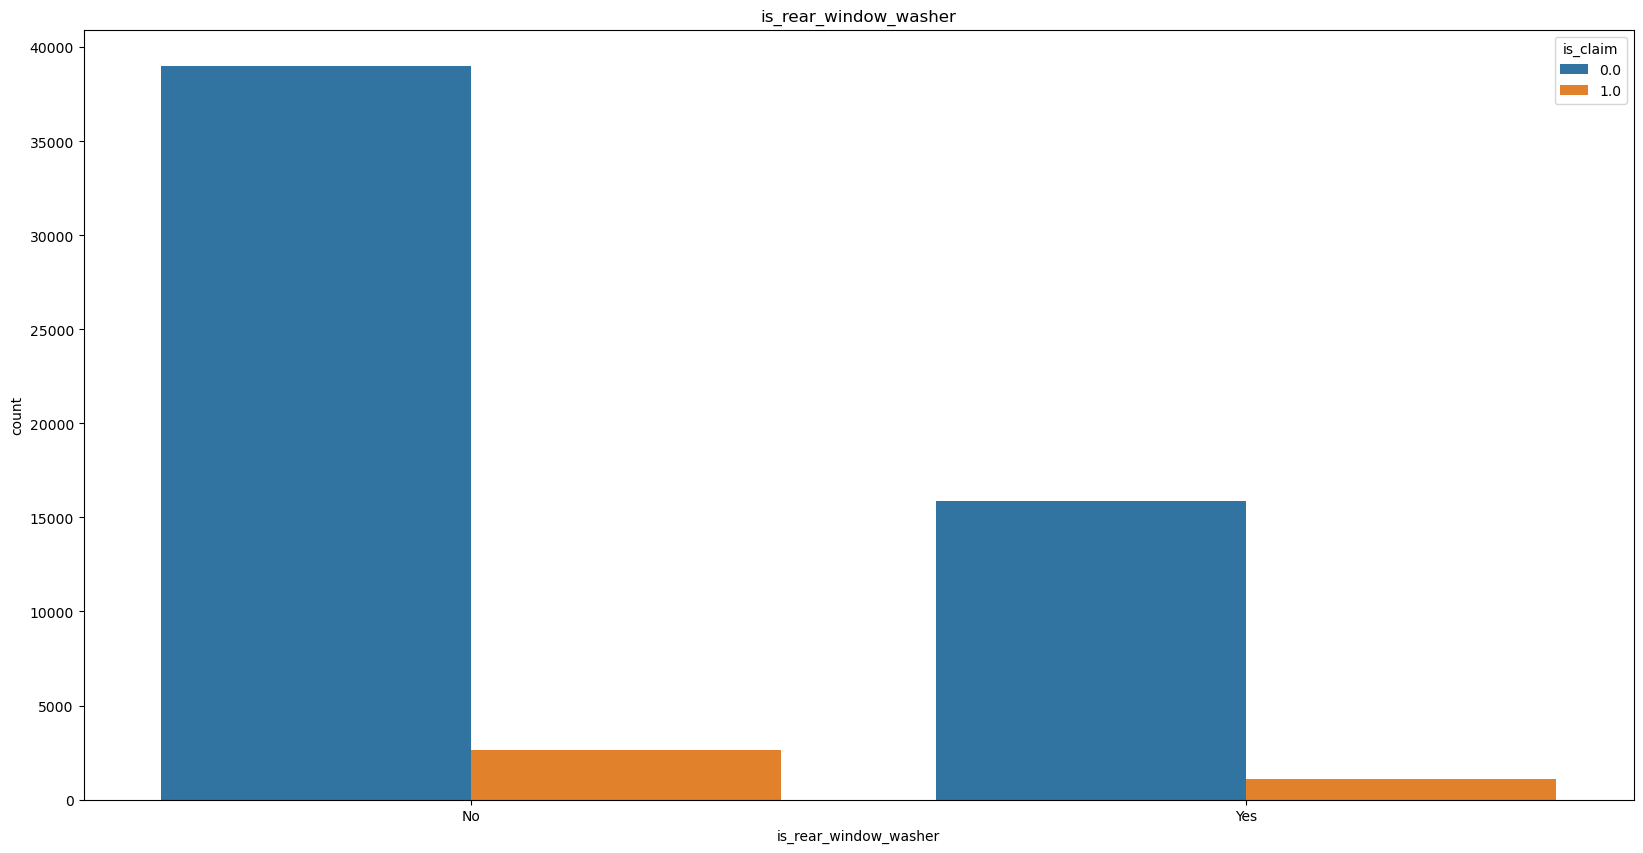

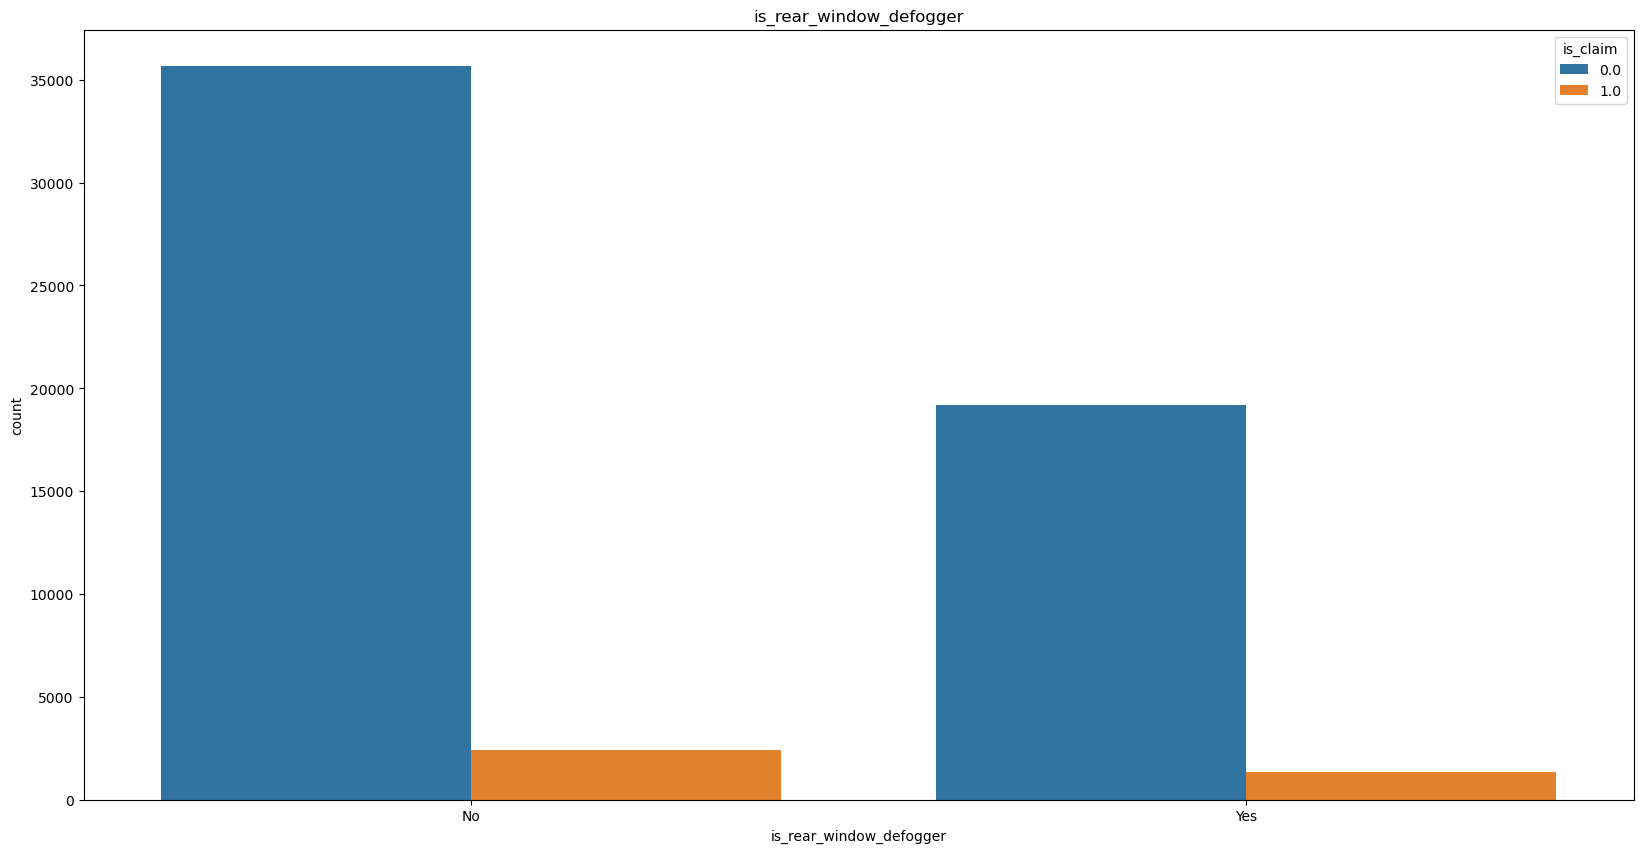

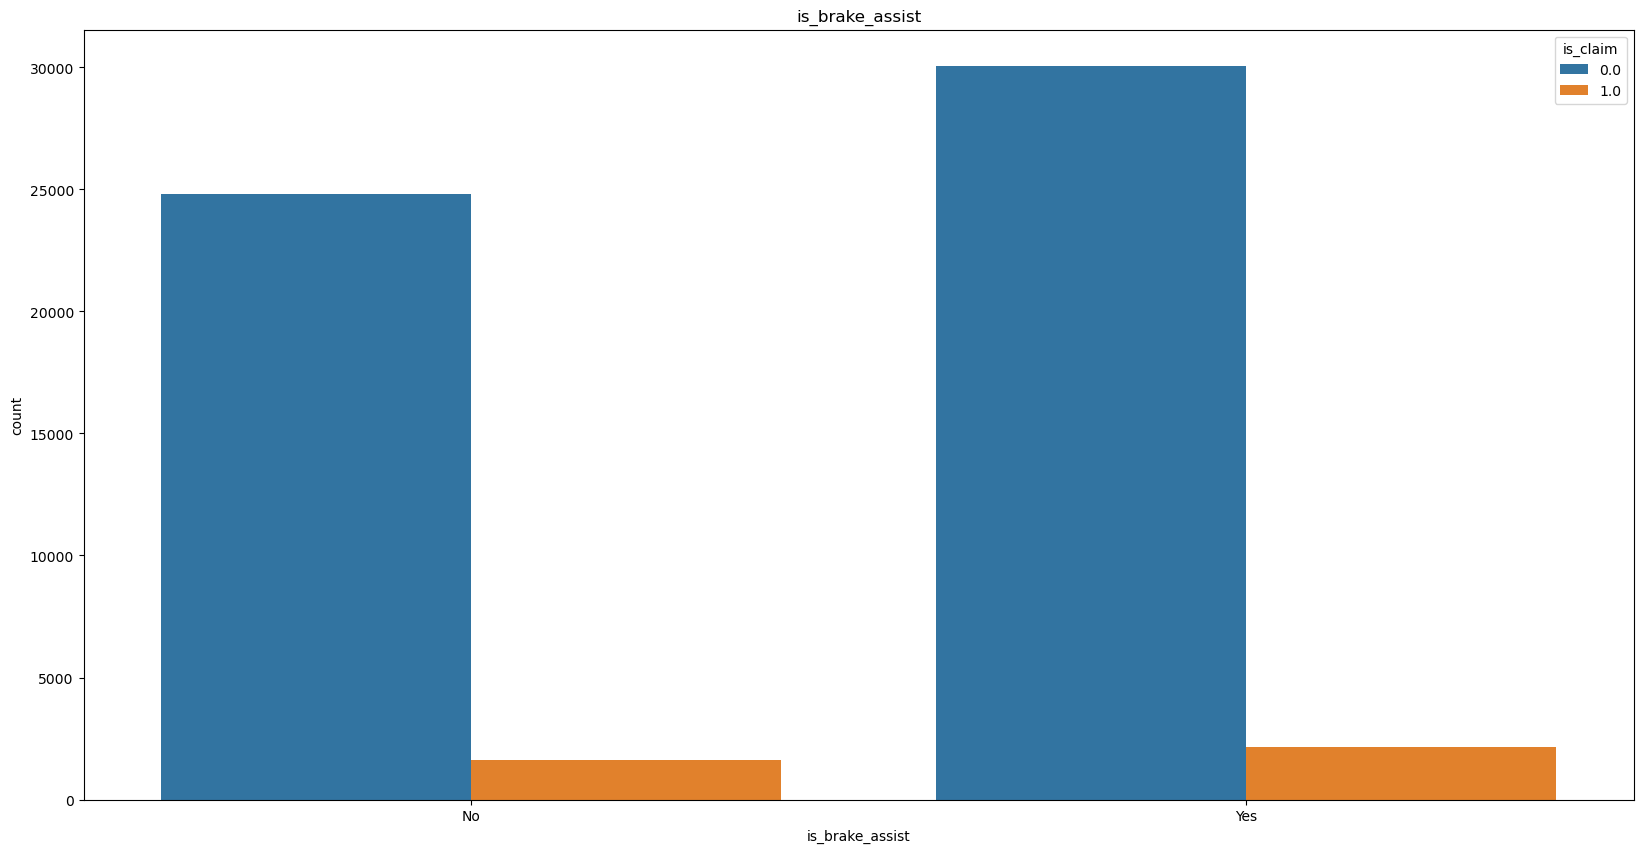

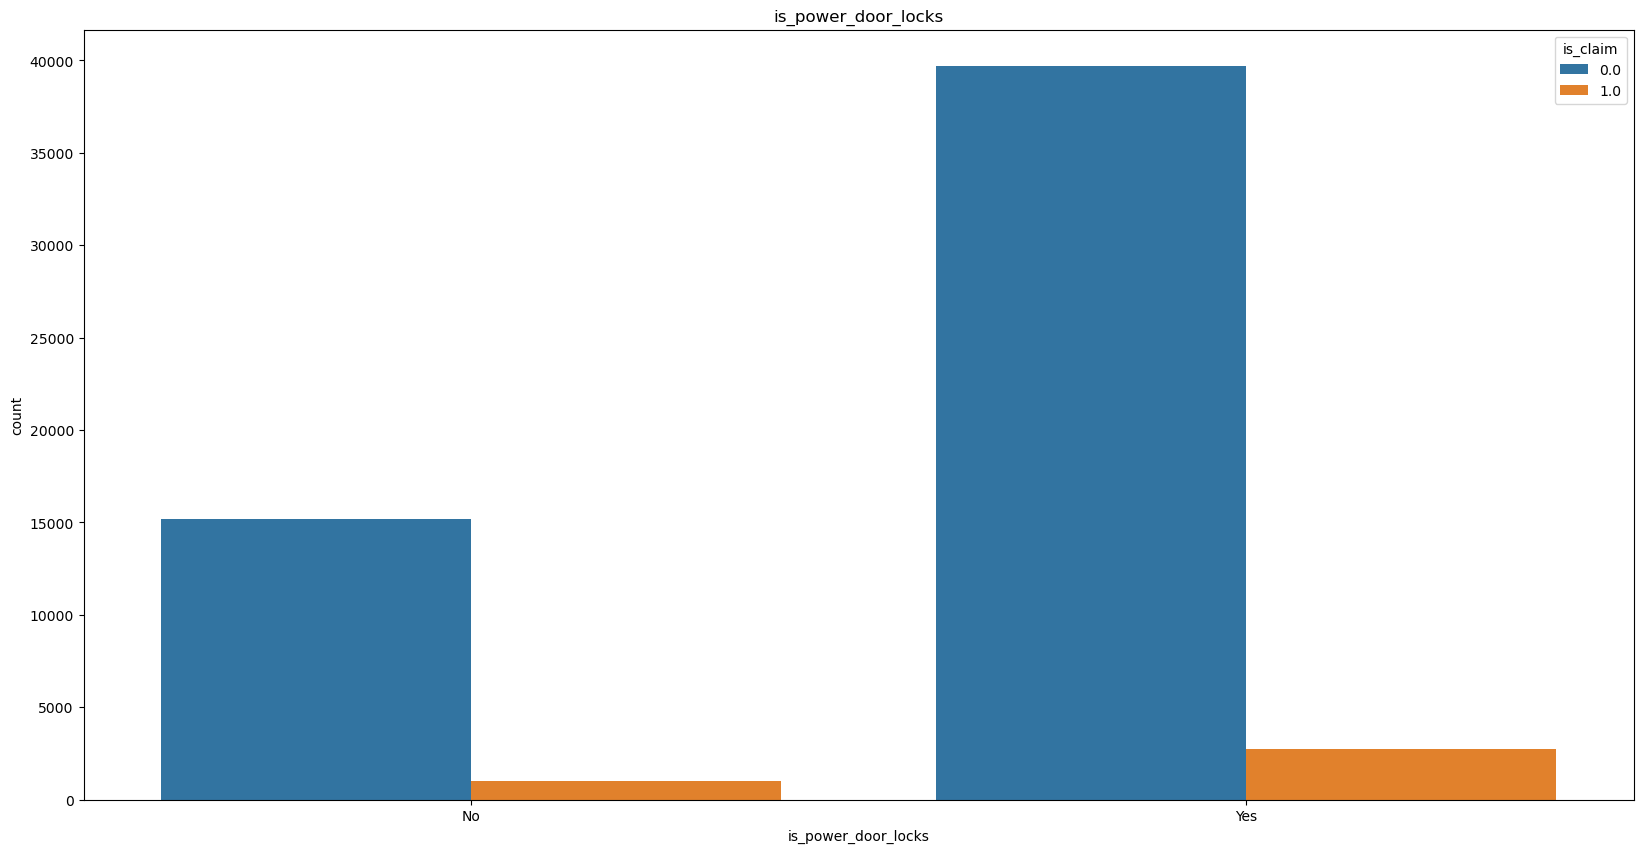

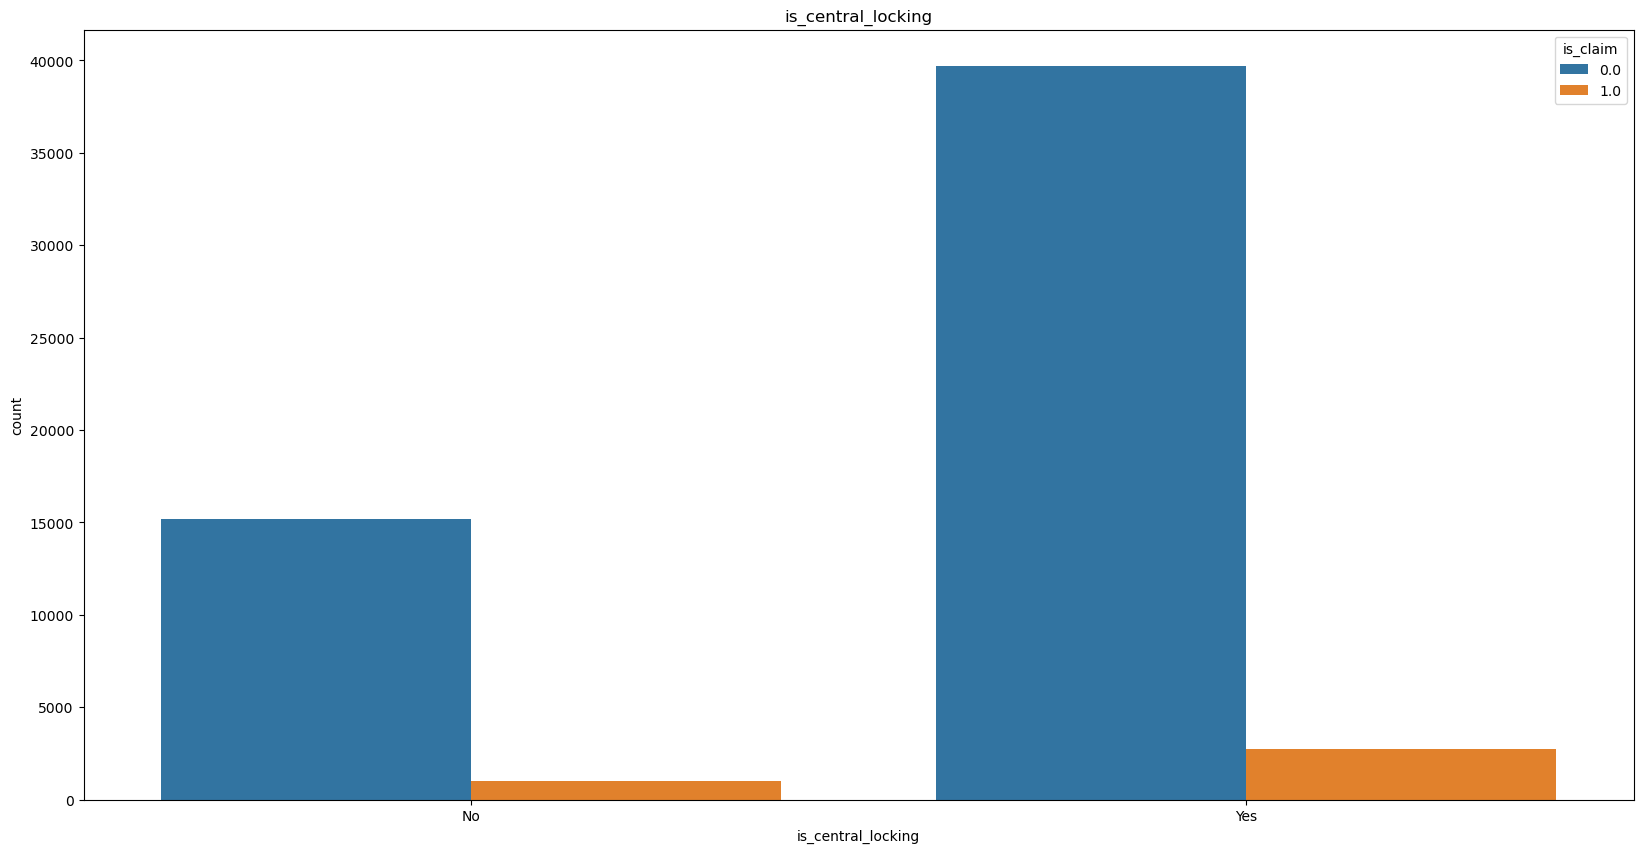

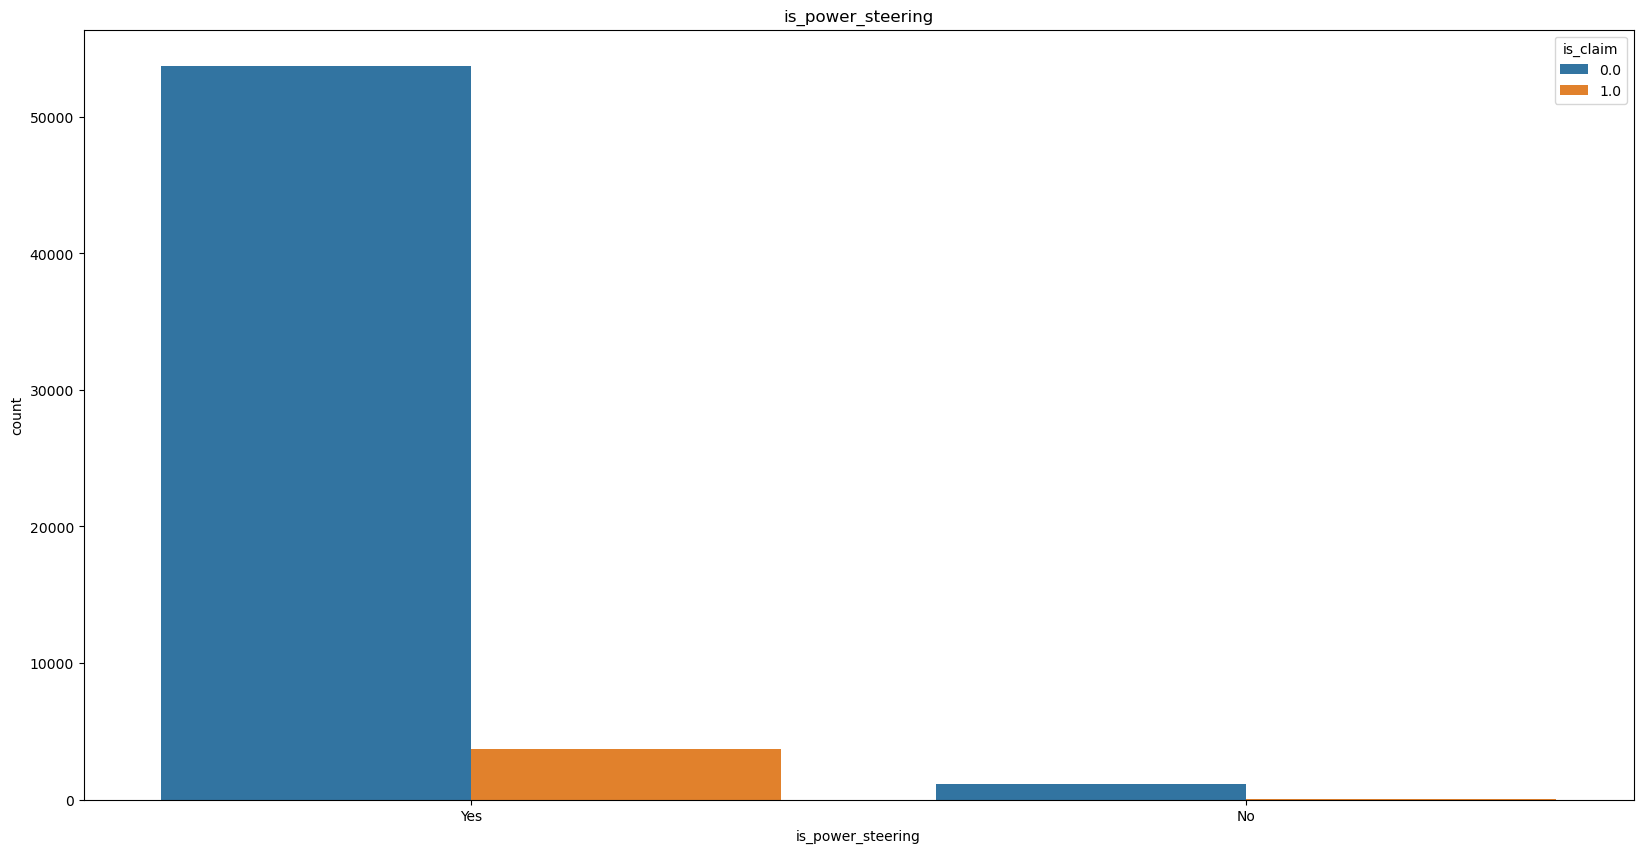

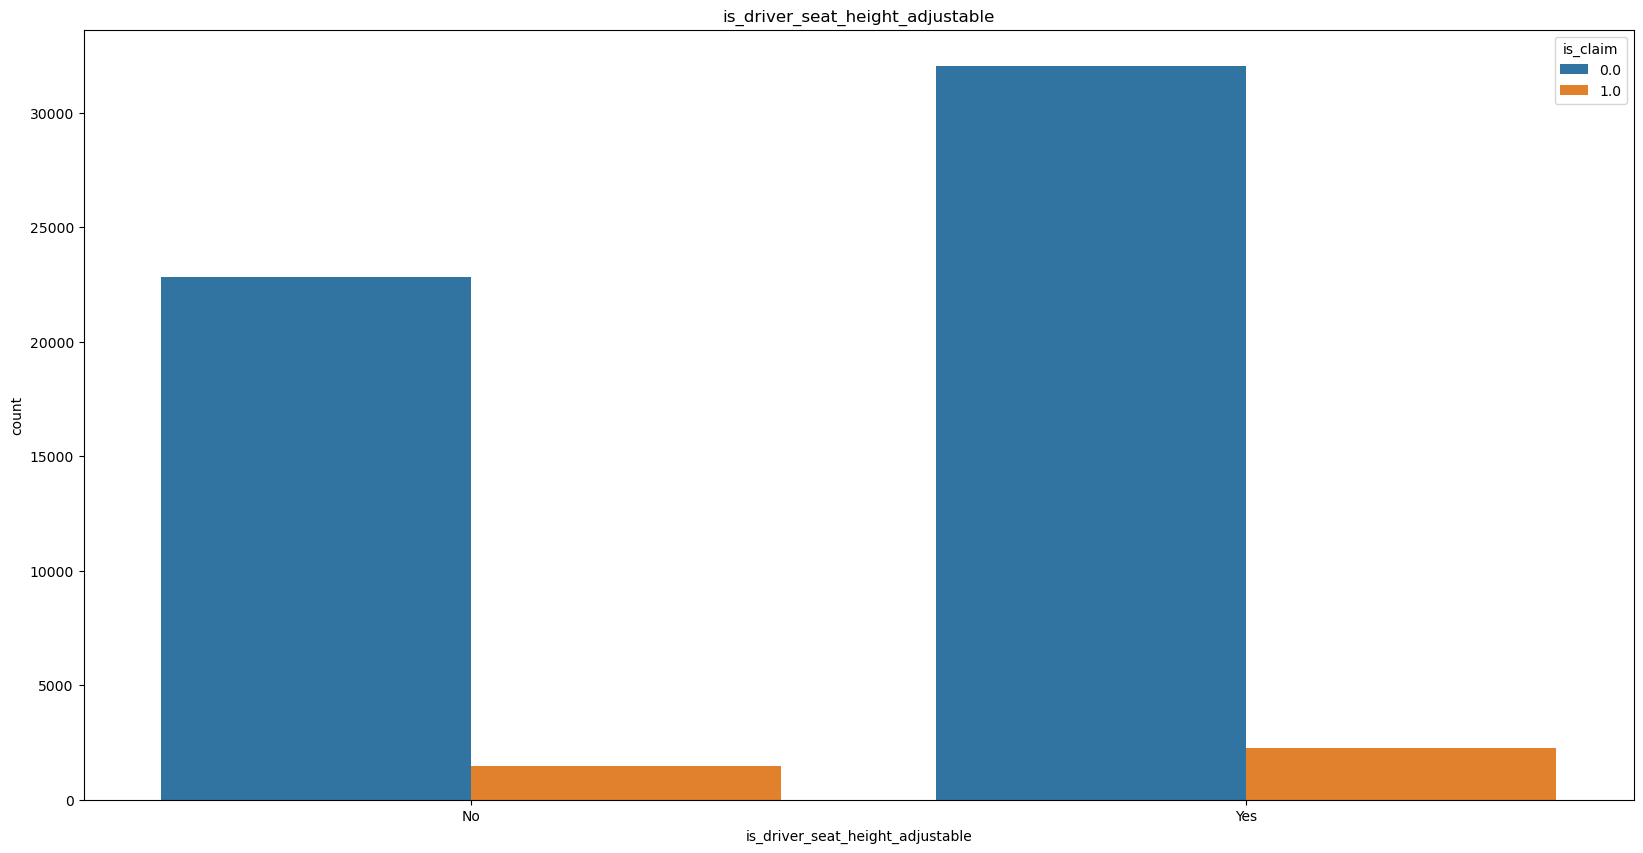

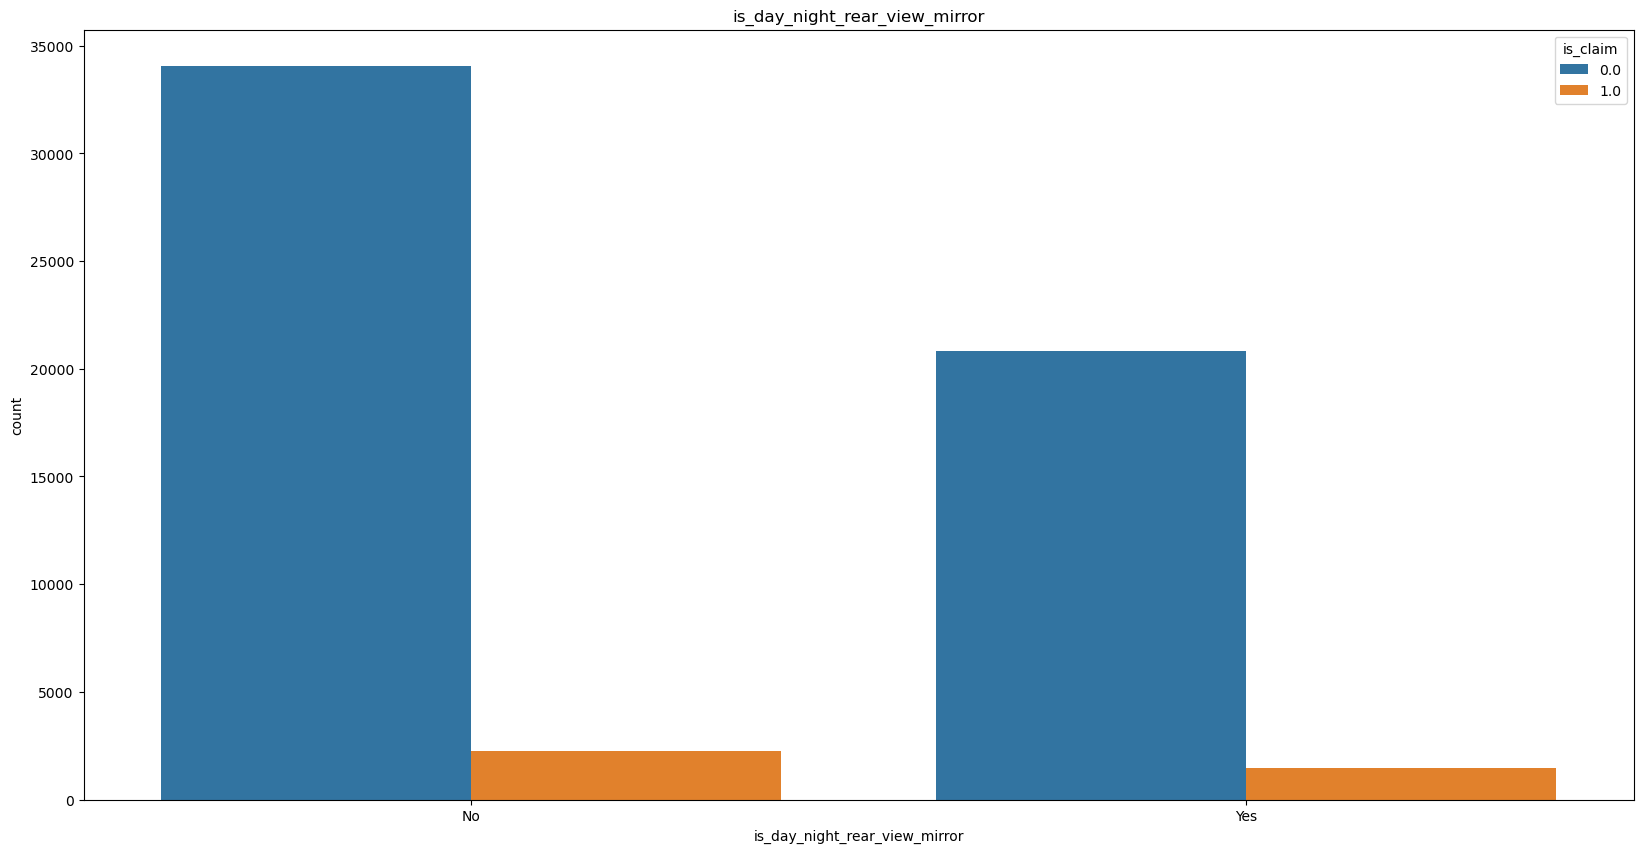

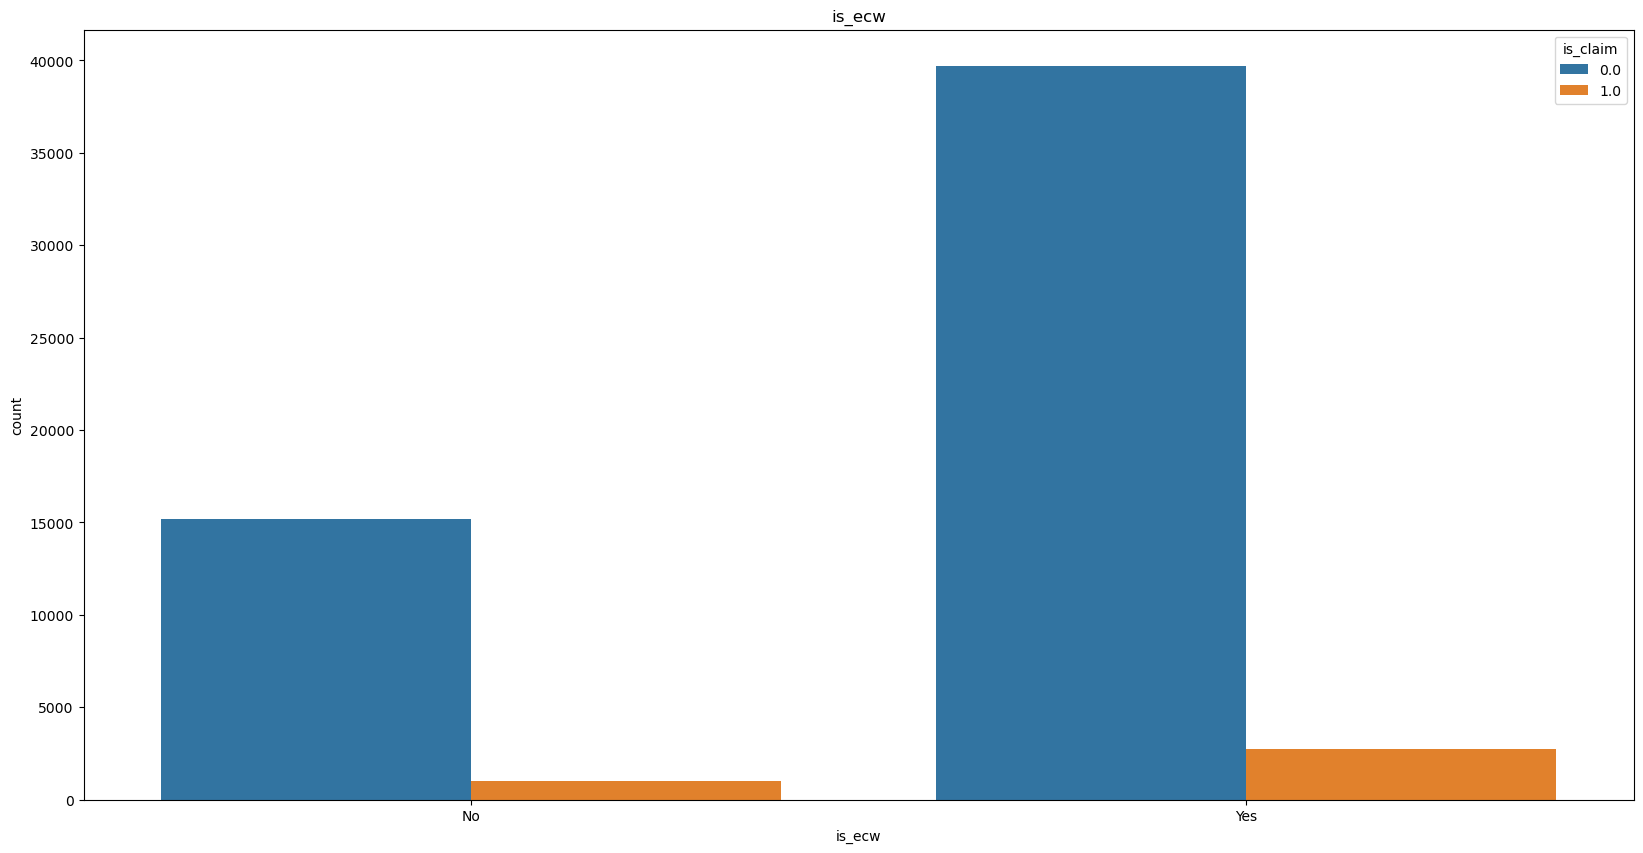

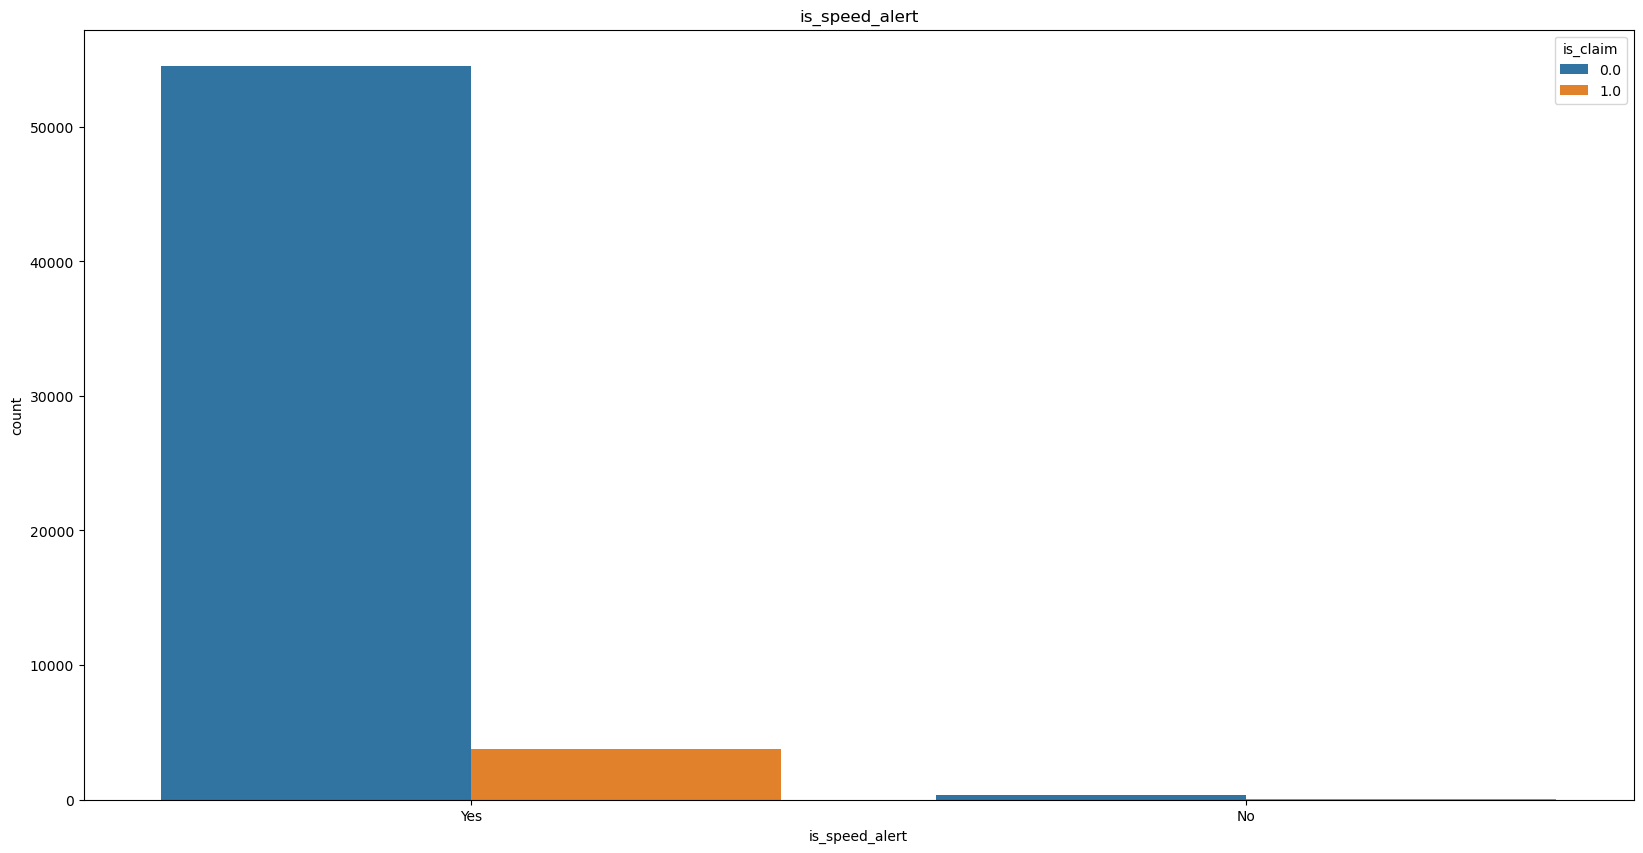

In [35]:
# cat vs cat
cat_col=[ 'area_cluster', 'segment', 'model', 'fuel_type',
       'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert',"is_claim"]
for i in cat_col[:-1]:
    sns.countplot(com[i],hue=com.is_claim)
    plt.title(i)
    plt.show()
    
# c8 is the area cluster where the most of the claim emerge
# k series dual-jet engine 
# no parking camera 
# model m6,b2 segment ,drum brakes are the some of the components bringing claims to the doors of insurance company

In [37]:
# checking missing values

com.isnull().sum()
# no missing values

policy_id                               0
policy_tenure                           0
age_of_car                              0
age_of_policyholder                     0
area_cluster                            0
population_density                      0
make                                    0
segment                                 0
model                                   0
fuel_type                               0
max_torque                              0
max_power                               0
engine_type                             0
airbags                                 0
is_esc                                  0
is_adjustable_steering                  0
is_tpms                                 0
is_parking_sensors                      0
is_parking_camera                       0
rear_brakes_type                        0
displacement                            0
cylinder                                0
transmission_type                       0
gear_box                          

# Feature engg & Statistical Analysis


In [42]:
com.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0


In [39]:
cat_col

['area_cluster',
 'segment',
 'model',
 'fuel_type',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert',
 'is_claim']

In [44]:
is_col=['is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera','is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

m={"Yes":1,"No":0}

for i in is_col:                            # if i.startswith("is")
    com[i]=com[i].replace(m)
    
com.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0


In [46]:
# maxtorque and bhp
com[["bhp","rpm_torque"]]=com.max_power.str.split("@",expand=True)

In [47]:
com.rename(columns={"rpm_torque":"rpm_power"},inplace=True)

In [48]:
com[["nm","rpm_torque"]]=com.max_torque.str.split("@",expand=True)

In [49]:
com.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,nm,rpm_torque
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36bhp,6000rpm,60Nm,3500rpm
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36bhp,6000rpm,60Nm,3500rpm


In [50]:
com.bhp.value_counts()

88.50bhp     29503
40.36bhp     24988
113.45bhp    23383
55.92bhp      7067
67.06bhp      4023
97.89bhp      3508
88.77bhp      2650
61.68bhp      1934
118.36bhp      599
Name: bhp, dtype: int64

In [51]:
com.nm.value_counts()

113Nm     29503
60Nm      24988
250Nm     23383
82.1Nm     7067
200Nm      6158
91Nm       4023
85Nm       1934
170Nm       599
Name: nm, dtype: int64

In [52]:
# remove bhp and rpm from the cols

com["bhp"]=com["bhp"].apply(lambda x: float(x[:-3]))
com["rpm_power"]=com["rpm_power"].apply(lambda x: float(x[:-3]))
com["rpm_torque"]=com["rpm_torque"].apply(lambda x: float(x[:-3]))
com["nm"]=com["nm"].apply(lambda x: float(x[:-2]))

In [53]:
com.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,nm,rpm_torque
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0


In [55]:
com.loc[:,["gross_weight","height","width"]].head()

,gross_weight,height,width
0,1185,1475,1515
1,1185,1475,1515
2,1185,1475,1515
3,1335,1515,1735
4,1155,1490,1579


In [59]:
# weight per unit
# age= age of the car/ age of the policy holder
# per unit power=rpm_power/bhp
# per unit torque=rpm_torque/nm

for i in [com]:
    i["weight_per_unit"]=i["gross_weight"]/(i["height"]*i["width"]*i["length"])
    i["per_unit_power"]=i["rpm_power"]/i["bhp"]
    i["per_unit_torque"]=i["rpm_torque"]/i["nm"]
    i["age"]=i["age_of_car"]/i["age_of_policyholder"]

In [60]:
com.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,nm,rpm_torque,weight_per_unit,per_unit_power,per_unit_torque,age
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.077612
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.053333


In [61]:
# two sample independent ttest on all numerical columns

com.select_dtypes(include=np.number).columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'is_claim', 'bhp', 'rpm_power', 'nm',
       'rpm_torque', 'weight_per_unit', 'per_unit_power', 'per_unit_torque',
       'age'],
      dtype='object')

In [63]:
num=['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density',   
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
        'bhp', 'rpm_power', 'nm',
       'rpm_torque', 'weight_per_unit', 'per_unit_power', 'per_unit_torque',
       'age']
len(num)

17

In [66]:
import scipy.stats as stats
signif_feat=[]
for i in num:
    zero=com.loc[com.is_claim==0,i]
    one=com.loc[com.is_claim==1,i]
    teststat,pvalue=stats.ttest_ind(zero,one)
    if pvalue<0.05:
        signif_feat.append(i)
    

In [67]:
signif_feat

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'width',
 'age']

In [69]:
# categorical target encoding
import category_encoders as ce

In [70]:
com.select_dtypes(include="object").columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type', 'ncap_rating'],
      dtype='object')

In [76]:
cat_cols=[ 'area_cluster', 'segment', 'model', 'fuel_type',
        'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type', 'ncap_rating']

In [74]:
# dropping target from newtest
newtrain.drop(["policy_id",'max_power',"max_torque"],axis=1,inplace=True)
newtest.drop(["policy_id",'max_power',"max_torque","is_claim"],axis=1,inplace=True)

In [75]:
newtrain.shape,newtest.shape

((58592, 49), (39063, 48))

In [78]:
#target encoding
#import category_encoders as ce
tgt_encoder=ce.TargetEncoder(cols=cat_cols)

x=newtrain.drop("is_claim",axis=1)
y=newtrain["is_claim"]

newx=tgt_encoder.fit_transform(x,y)
newtest=tgt_encoder.transform(newtest)

In [79]:
newx.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,bhp,rpm_power,nm,rpm_torque,weight_per_unit,per_unit_power,per_unit_torque,age
0,0.515874,0.05,0.644231,0.051771,4990,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,0.063854,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.077612
1,0.672619,0.02,0.375000,0.070825,27003,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,0.063854,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.053333
2,0.841110,0.02,0.384615,0.070972,4076,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,0.063854,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.052000
3,0.900277,0.11,0.432692,0.076692,21622,1,0.064099,0.074074,0.066384,0.074074,2,1,1,0,1,1,0.063871,1197,4,0.064181,5,0.066873,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,0.064994,88.50,6000.0,113.0,4400.0,1.271313e-07,67.796610,38.938053,0.254222
4,0.596403,0.11,0.634615,0.057745,34738,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,0.063871,999,3,0.064181,5,0.066873,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,0.064994,67.06,5500.0,91.0,4250.0,1.315795e-07,82.016105,46.703297,0.173333


In [80]:
newtest.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,bhp,rpm_power,nm,rpm_torque,weight_per_unit,per_unit_power,per_unit_torque,age
58592,0.341732,0.00,0.586538,0.070972,4076,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,0.063854,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.000000
58593,0.307241,0.13,0.442308,0.069870,8794,1,0.068581,0.068162,0.066384,0.068162,2,0,1,0,1,0,0.063871,1197,4,0.063854,5,0.066873,4.8,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,0.064994,88.50,6000.0,113.0,4400.0,1.307959e-07,67.796610,38.938053,0.293913
58594,0.327924,0.12,0.451923,0.069870,8794,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,0.063871,999,3,0.064181,5,0.066873,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,0.064994,67.06,5500.0,91.0,4250.0,1.315795e-07,82.016105,46.703297,0.265532
58595,0.782654,0.01,0.461538,0.057745,34738,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,0.063854,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.021667
58596,1.233404,0.02,0.634615,0.057745,34738,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,0.063854,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.031515


In [82]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
n_cols=['policy_tenure','population_density','displacement','turning_radius', 'length',
       'width', 'height', 'gross_weight','bhp', 'rpm_power', 'nm',
       'rpm_torque', 'weight_per_unit', 'per_unit_power', 'per_unit_torque']


for i in n_cols:
    newx.loc[:,i]=sc.fit_transform(pd.DataFrame(newx.loc[:,i]))
    newtest.loc[:,i]=sc.transform(pd.DataFrame(newtest.loc[:,i]))

# Modelling

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [88]:
# list_models

def base_models():
    models=dict()
    models["lg"]=LogisticRegression()
    models["dtree"]=DecisionTreeClassifier()
    models["rf"]=RandomForestClassifier()
    models["etree"]=ExtraTreesClassifier()
    models["adaboost"]=AdaBoostClassifier()
    models["gbm"]=GradientBoostingClassifier()
    models["xgb"]=XGBClassifier()
    models["lgbm"]=LGBMClassifier()
    return models
    

In [89]:
base_models()

{'lg': LogisticRegression(),
 'dtree': DecisionTreeClassifier(),
 'rf': RandomForestClassifier(),
 'etree': ExtraTreesClassifier(),
 'adaboost': AdaBoostClassifier(),
 'gbm': GradientBoostingClassifier(),
 'xgb': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'lgbm': LGBMClassifier(

In [95]:
# evaluate the model...
from sklearn.model_selection import StratifiedKFold,cross_val_score


def eval_model(model):
    cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    scores=cross_val_score(estimator=model,X=newx,y=y,scoring="f1",cv=cv,error_score="raise",n_jobs=-1)
    
    return scores

In [101]:
# building the model
model=base_models()

# list for result and model names
result,names=list(),list()

for name,model in model.items():
    scores=eval_model(model)
    result.append(scores) # this will save the f1 score
    names.append(name) # save the name of the models
    print(">%s %.3f (%.3f)" %(name,np.mean(scores),np.std(scores)))

>lg 0.000 (0.000)
>dtree 0.086 (0.014)
>rf 0.018 (0.009)
>etree 0.033 (0.010)
>adaboost 0.000 (0.000)
>gbm 0.001 (0.002)
>xgb 0.001 (0.002)
>lgbm 0.000 (0.000)


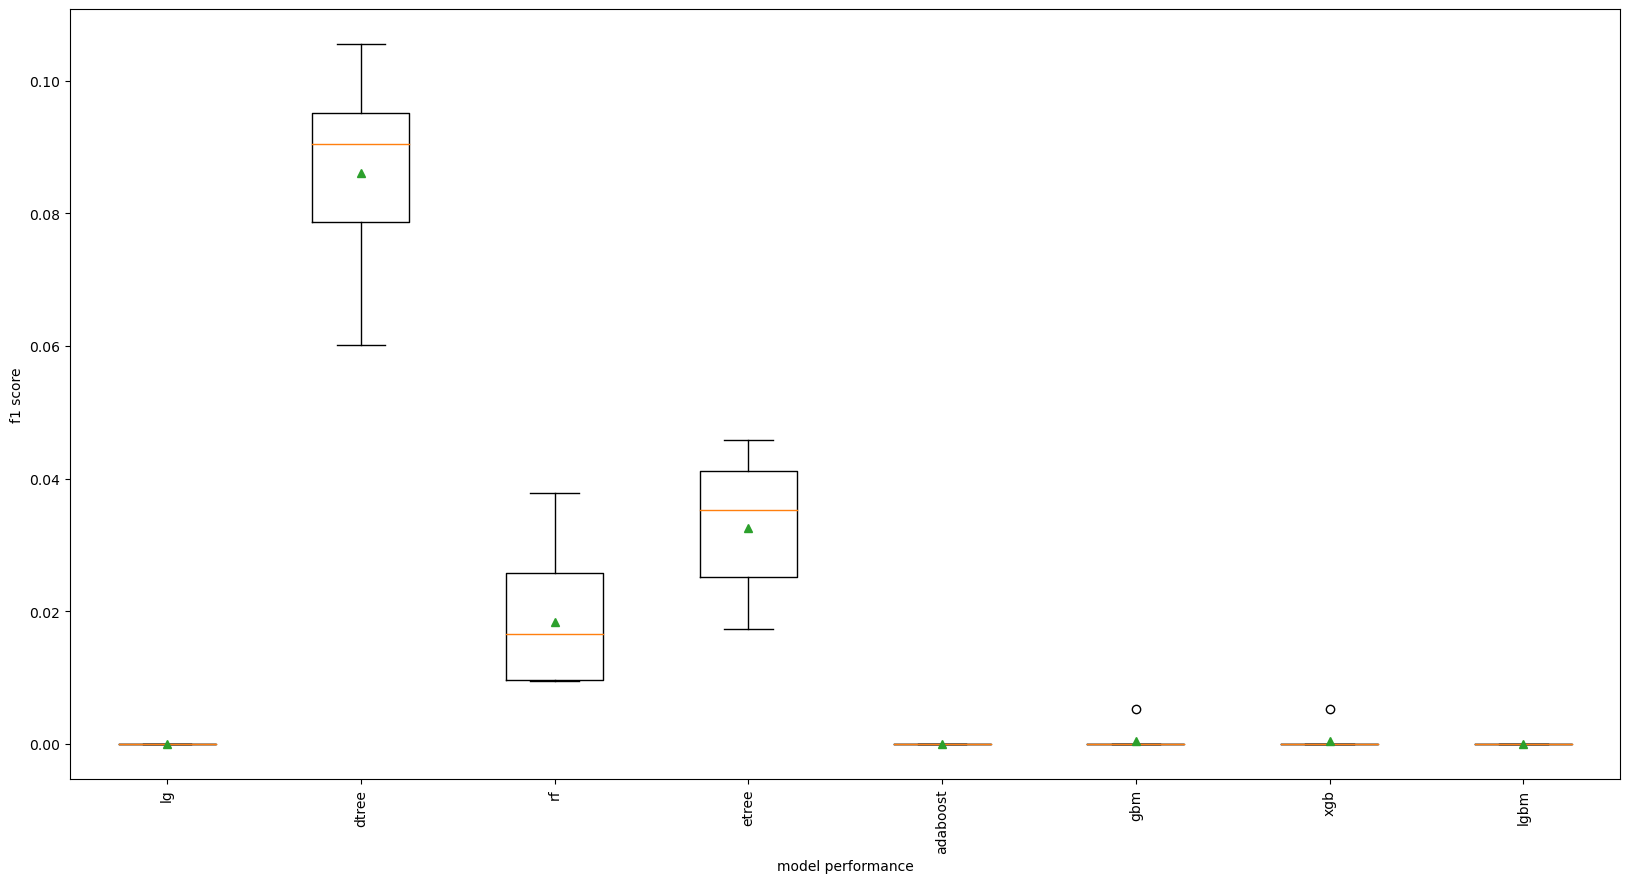

In [104]:
# plotting the output
plt.boxplot(result,labels = names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel("f1 score")
plt.xlabel("model performance")
plt.show()

In [105]:
# none of the advance model give result to data imbalance so oversampling the data using smote

from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy="minority")

smotex,smotey=smote.fit_resample(newx,y)

In [106]:
def base_models():
    models=dict()
    models["lg"]=LogisticRegression()
    models["dtree"]=DecisionTreeClassifier()
    models["rf"]=RandomForestClassifier()
    models["etree"]=ExtraTreesClassifier()
    models["adaboost"]=AdaBoostClassifier()
    models["gbm"]=GradientBoostingClassifier()
    models["xgb"]=XGBClassifier()
    models["lgbm"]=LGBMClassifier()
    return models

In [107]:
def eval_model(model):
    cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    scores=cross_val_score(estimator=model,X=smotex,y=smotey,scoring="f1",cv=cv,error_score="raise",n_jobs=-1)
    
    return scores

In [108]:
model=base_models()

# list for result and model names
result,names=list(),list()

for name,model in model.items():
    scores=eval_model(model)
    result.append(scores) # this will save the f1 score
    names.append(name) # save the name of the models
    print(">%s %.3f (%.3f)" %(name,np.mean(scores),np.std(scores)))

>lg 0.588 (0.004)
>dtree 0.917 (0.002)
>rf 0.934 (0.001)
>etree 0.934 (0.002)
>adaboost 0.723 (0.007)
>gbm 0.873 (0.008)
>xgb 0.959 (0.003)
>lgbm 0.951 (0.003)


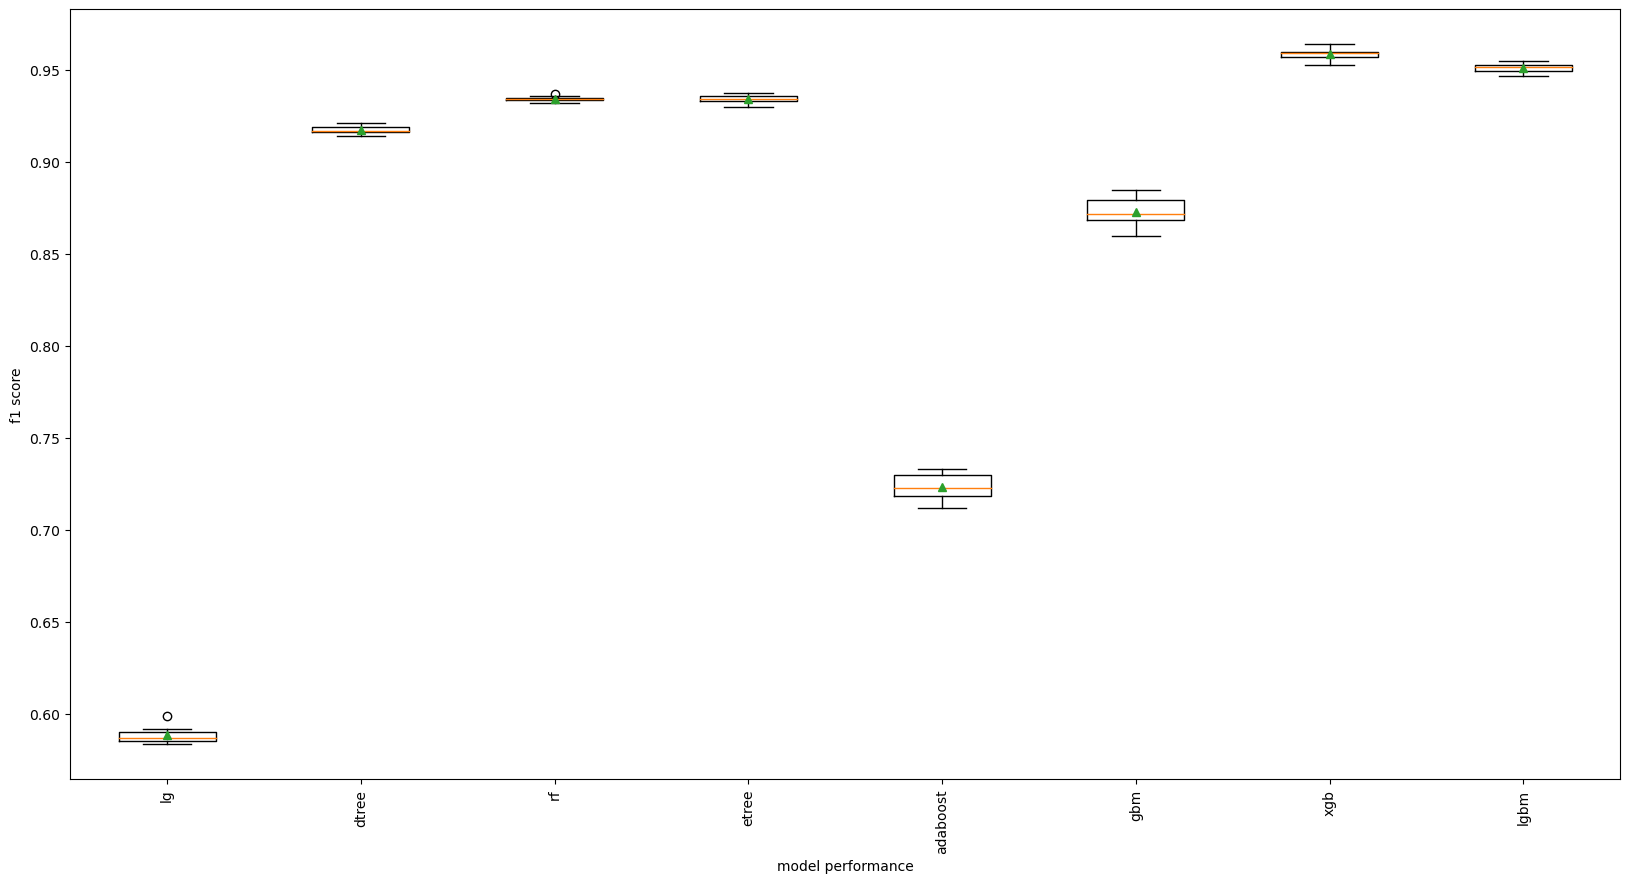

In [109]:
# plotting the output
plt.boxplot(result,labels = names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel("f1 score")
plt.xlabel("model performance")
plt.show()

In [110]:
# rf,etree,gbm,xgb,lgbm
rf=RandomForestClassifier()
pred=[]
kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
# final randomfrest model
for train_index,test_index in kf.split(smotex,smotey):
    xtrain=smotex.loc[train_index]
    ytrain=smotey.loc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(newtest))

In [111]:
finalpred=pd.DataFrame(pred).T.mode(axis=1)[0]
sub=pd.DataFrame({"policy_id":test.policy_id,
                 "is_claim":finalpred})

sub.to_csv("insrf.csv",index=False)

In [112]:
cd

C:\Users\bprat


In [113]:
xgb=XGBClassifier()
predxgb=[]
kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
# final randomfrest model
for train_index,test_index in kf.split(smotex,smotey):
    xtrain=smotex.loc[train_index]
    ytrain=smotey.loc[train_index]
    predxgb.append(xgb.fit(xtrain,ytrain).predict(newtest))

In [114]:
finalpred=pd.DataFrame(predxgb).T.mode(axis=1)[0]
sub=pd.DataFrame({"policy_id":test.policy_id,
                 "is_claim":finalpred})

sub.to_csv("insxgb.csv",index=False)

In [ ]:
et=ExtraTreesClassifier()
predet=[]
kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
# final randomfrest model
for train_index,test_index in kf.split(smotex,smotey):
    xtrain=smotex.loc[train_index]
    ytrain=smotey.loc[train_index]
    predet.append(et.fit(xtrain,ytrain).predict(newtest))

In [115]:
gb=GradientBoostingClassifier()
predgb=[]
kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
# final randomfrest model
for train_index,test_index in kf.split(smotex,smotey):
    xtrain=smotex.loc[train_index]
    ytrain=smotey.loc[train_index]
    predgb.append(gb.fit(xtrain,ytrain).predict(newtest))

In [116]:
finalpred=pd.DataFrame(predgb).T.mode(axis=1)[0]
sub=pd.DataFrame({"policy_id":test.policy_id,
                 "is_claim":finalpred})

sub.to_csv("insgbm.csv",index=False)

In [119]:
lr=LogisticRegression()
predlr=[]
kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
# final randomfrest model
for train_index,test_index in kf.split(smotex,smotey):
    xtrain=smotex.loc[train_index]
    ytrain=smotey.loc[train_index]
    predlr.append(lr.fit(xtrain,ytrain).predict(newtest))

In [120]:
finalpred=pd.DataFrame(predlr).T.mode(axis=1)[0]
sub=pd.DataFrame({"policy_id":test.policy_id,
                 "is_claim":finalpred})

sub.to_csv("insglr.csv",index=False)

In [121]:
# reduce the fold to 5
# parameter tunning for xgbm and lgbm
# take logistic regression as the best model and creating a stackingclassifier